### ***``ANOVA, Post-hoc tests, Normality and Homogenity tests on India's Population & COVID-19 datasets``***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import scipy
import statsmodels as stm

In [2]:
pd.set_option('display.max_rows',50)

In [3]:
state_dly_cases = pd.read_csv("Datasets/covid_19_india.csv")

In [4]:
state_dly_cases.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
8481,8482,16/11/20,8:00 AM,Telengana,-,-,242084,1407,257876
8482,8483,16/11/20,8:00 AM,Tripura,-,-,30555,364,31962
8483,8484,16/11/20,8:00 AM,Uttarakhand,-,-,62543,1107,68215
8484,8485,16/11/20,8:00 AM,Uttar Pradesh,-,-,480965,7372,511304
8485,8486,16/11/20,8:00 AM,West Bengal,-,-,394576,7661,431551


In [5]:
state_ws_test = pd.read_csv("Datasets/StatewiseTestingDetails.csv")

In [6]:
state_ws_test.tail()

,Date,State,TotalSamples,Negative,Positive
7307,2020-11-11,West Bengal,5047335.0,NaN,NaN
7308,2020-11-12,West Bengal,5091700.0,NaN,NaN
7309,2020-11-13,West Bengal,5136012.0,NaN,NaN
7310,2020-11-14,West Bengal,5180139.0,NaN,NaN
7311,2020-11-15,West Bengal,5218797.0,NaN,NaN


In [7]:
state_ws_test.shape

(7312, 5)

In [8]:
india_pop = pd.read_csv("Datasets/population_india_census2011.csv.txt")

In [9]:
india_pop.head()

,Sno,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
1,2,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929
2,3,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
3,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
4,5,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931


In [10]:
india_pop.shape

(36, 8)

##### **Merging the State Population and State wise testing dataframes**

In [11]:
np.count_nonzero(state_ws_test['State'].unique())

35

In [12]:
np.count_nonzero(india_pop['State / Union Territory'].unique())

36

In [13]:
set(india_pop['State / Union Territory'].unique()) - set(state_ws_test['State'].unique())

{'Lakshadweep', 'Telengana'}

In [14]:
np.sort(india_pop['State / Union Territory'].unique())

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telengana',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [15]:
np.sort(state_ws_test['State'].unique())

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'], dtype=object)

##### **Here, I found out that ``State wise COVID testing dataset`` has no information about testing carried out in ``Lakshadweep``. And, ``Telangana`` spelling is incorrect in ``Indian Pop dataset``.**

In [16]:
india_pop['State / Union Territory'] = india_pop['State / Union Territory'].apply(lambda state: 'Telangana' if state == 'Telengana' else state)

In [17]:
set(india_pop['State / Union Territory'].unique()) - set(state_ws_test['State'].unique()) 

{'Lakshadweep'}

In [18]:
pop_test_df = pd.merge(left=state_ws_test,right=india_pop,left_on='State',right_on='State / Union Territory',how='outer')

In [19]:
pop_test_df.shape

(7313, 13)

In [20]:
pop_test_df.tail()

,Date,State,TotalSamples,Negative,Positive,Sno,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio
7308,2020-11-12,West Bengal,5091700.0,NaN,NaN,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
7309,2020-11-13,West Bengal,5136012.0,NaN,NaN,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
7310,2020-11-14,West Bengal,5180139.0,NaN,NaN,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
7311,2020-11-15,West Bengal,5218797.0,NaN,NaN,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
7312,NaN,NaN,NaN,NaN,NaN,36,Lakshadweep,64473,14141,50332,32 km2 (12 sq mi),"2,013/km2 (5,210/sq mi)",946


##### **Getting rid of few features :: ``Sno`` as it is a dummy running sequence number and ``State`` as we already have ``State / Union Territory`` providing the same information.** 

In [21]:
pop_test_df.drop(labels=['Sno','State'],axis=1,inplace=True)

##### **Renaming ``State / Union Territory`` as ``State``.**

In [22]:
pop_test_df.rename(columns={'State / Union Territory':'State'},inplace=True)

In [23]:
pd.concat([pop_test_df.head(3),pop_test_df.tail(3)],axis=0)

,Date,TotalSamples,Negative,Positive,State,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,2020-04-17,1403.0,1210,12.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876
1,2020-04-24,2679.0,NaN,27.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876
2,2020-04-27,2848.0,NaN,33.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876
7310,2020-11-14,5180139.0,NaN,NaN,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
7311,2020-11-15,5218797.0,NaN,NaN,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
7312,NaN,NaN,NaN,NaN,Lakshadweep,64473,14141,50332,32 km2 (12 sq mi),"2,013/km2 (5,210/sq mi)",946


In [24]:
pop_test_df['Density in km2'] = pop_test_df['Density'].apply(lambda row : np.float(row.split('/')[0].replace(",",'')))

In [25]:
pd.concat([pop_test_df.head(3),pop_test_df.tail(3)],axis=0)

,Date,TotalSamples,Negative,Positive,State,Population,Rural population,Urban population,Area,Density,Gender Ratio,Density in km2
0,2020-04-17,1403.0,1210,12.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,46.0
1,2020-04-24,2679.0,NaN,27.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,46.0
2,2020-04-27,2848.0,NaN,33.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,46.0
7310,2020-11-14,5180139.0,NaN,NaN,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953,1029.0
7311,2020-11-15,5218797.0,NaN,NaN,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953,1029.0
7312,NaN,NaN,NaN,NaN,Lakshadweep,64473,14141,50332,32 km2 (12 sq mi),"2,013/km2 (5,210/sq mi)",946,2013.0


In [26]:
state_density_df = pop_test_df.groupby(['State'])[['Density in km2']].max().reset_index()

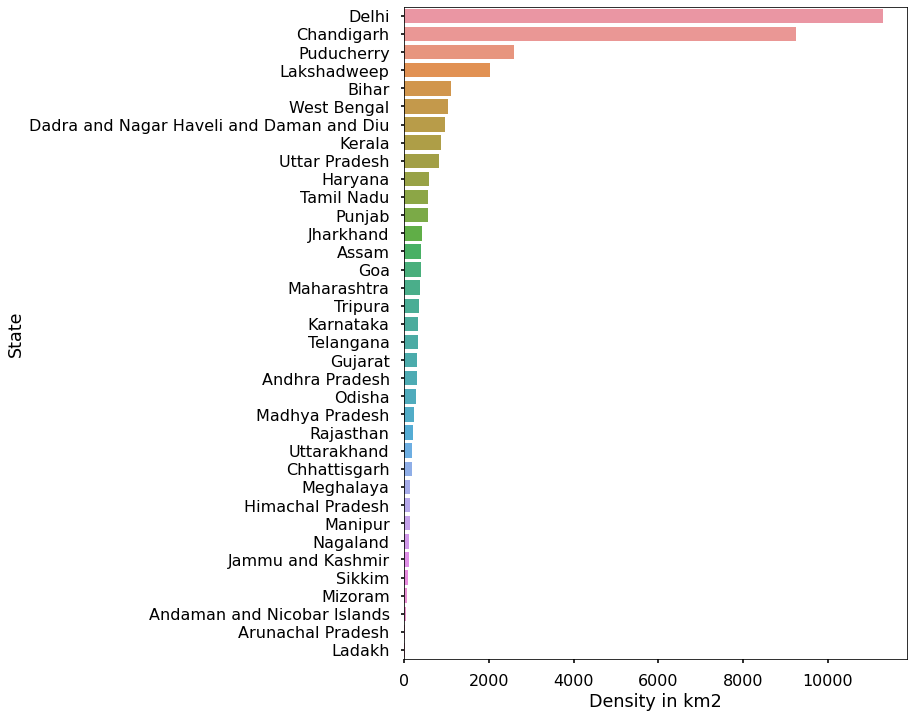

In [27]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(9,12))
    sns.barplot(data=state_density_df.sort_values(by='Density in km2',ascending=False),y='State',x='Density in km2',orient='h');

##### **``'Delhi'`` and ``'Chandigarh'`` totally stands out in this plot with the highest densities values.**

In [28]:
def dense_groups(density=0):
    """
    Description: This function defines the density group based on the state's density value.
    Input: It accepts only one parameter -- density (by default its 0)
    Return: Returns the density group name.
    """
    try:
        if 0<density<=300:
            grp_name = 'Dense1'
        elif 300<density<=600:
            grp_name = 'Dense2' 
        elif 600<density<=900:
            grp_name = 'Dense3'
        elif 900<density<=1200:
            grp_name = 'Dense4'
        else:
            grp_name = 'Dense5'
    except ValueError as err:
        pass
    return grp_name

In [29]:
pop_test_df['Dense_grp'] = list(map(dense_groups,pop_test_df['Density in km2']))

In [30]:
pop_test_df.head()

,Date,TotalSamples,Negative,Positive,State,Population,Rural population,Urban population,Area,Density,Gender Ratio,Density in km2,Dense_grp
0,2020-04-17,1403.0,1210,12.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,46.0,Dense1
1,2020-04-24,2679.0,NaN,27.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,46.0,Dense1
2,2020-04-27,2848.0,NaN,33.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,46.0,Dense1
3,2020-05-01,3754.0,NaN,33.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,46.0,Dense1
4,2020-05-16,6677.0,NaN,33.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,46.0,Dense1


In [31]:
state_ws_nulls_in_pos = pop_test_df[pop_test_df['Positive'].isna()].groupby(['State'])[['State']].count().rename(columns={'State':'Nulls_in_pos'}).reset_index()

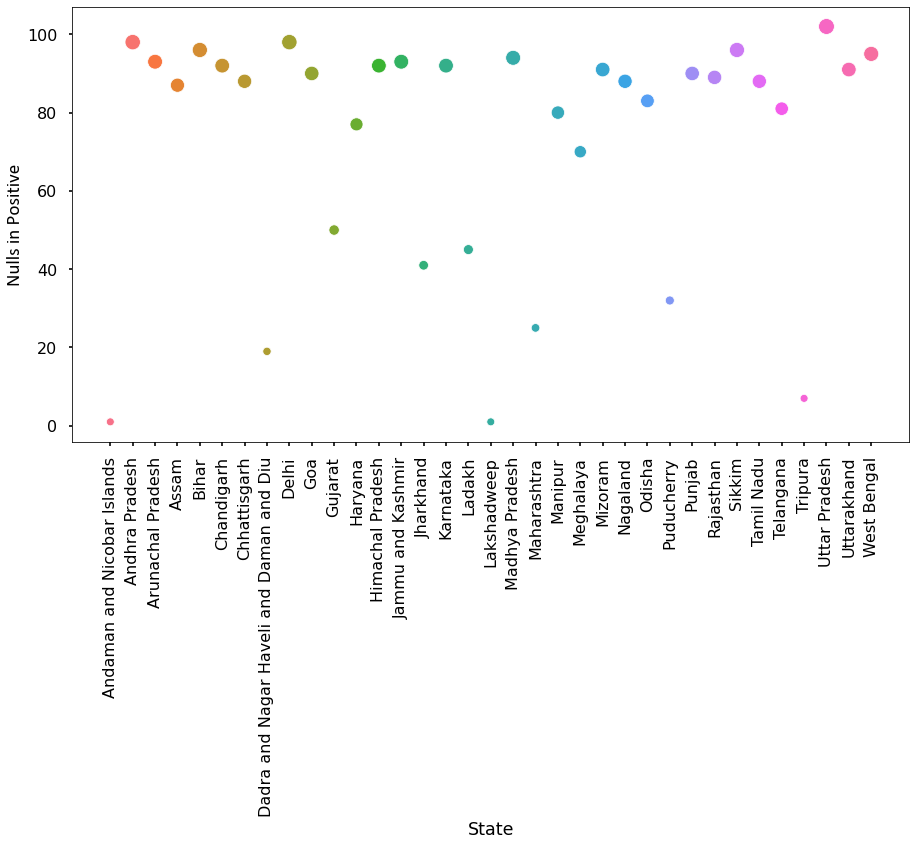

In [32]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(15,8))
    sns.scatterplot(data=state_ws_nulls_in_pos,x='State',y='Nulls_in_pos',size=((state_ws_nulls_in_pos['Nulls_in_pos']*.1)**2),hue='State',legend=False)
    plt.xticks(rotation=90)
    plt.ylabel("Nulls in Positive", fontdict={'size':19,'family':'calibri','style':'normal'})

##### **Here, we came to know that majority of the states have same number of NULLS in the positive cases.**

In [33]:
pop_test_df.head()

,Date,TotalSamples,Negative,Positive,State,Population,Rural population,Urban population,Area,Density,Gender Ratio,Density in km2,Dense_grp
0,2020-04-17,1403.0,1210,12.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,46.0,Dense1
1,2020-04-24,2679.0,NaN,27.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,46.0,Dense1
2,2020-04-27,2848.0,NaN,33.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,46.0,Dense1
3,2020-05-01,3754.0,NaN,33.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,46.0,Dense1
4,2020-05-16,6677.0,NaN,33.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,46.0,Dense1


In [34]:
def font_dicts(kind=['xlabel','ylabel','title']):
    """
    Description: This function is created for defining the font dictionaries of labels and titles for plots.
    
    Input parameters: It accepts only one below agrument:
            1. kind : Can take one of values --> ['xlabel','ylabel','title']
    
    Retuns: fdict with values of 'size', 'family' and 'color'
    """
    try:
        if kind == 'xlabel':
            fdict = {'size':16,'family':'calibri','style':'oblique','color':'blue'}
        elif kind == 'ylabel':
            fdict = {'size':16,'family':'calibri','style':'oblique','color':'k'}
        elif kind == 'title':
            fdict = {'size':17,'family':'calibri','style':'oblique','color':'brown'}
        else:
            fdict = {'size':16,'family':'calibri','style':'oblique','color':'k'}
    except ValueError as err:
        pass
    return fdict

In [35]:
def plot_hist_kde(d_frame,grp_by_col,dist_col,title=None):
    """
    Description: This function plot the distribution of data
    
    Input Parameters: It accepts below arguments:
            1. d_frame : Dataset of type pandas dataframe
            2. grp_by_col : Column for grouping the data of several states
            3. dist_col : Column whose data distribution to be visualized
            4. title : Title of the plot
    
    Return: None
    """
    all_states = d_frame[grp_by_col].unique()
    with plt.style.context('seaborn'):
        for state in all_states:
            plt.figure(figsize=(8,5))
            d_frame[d_frame[grp_by_col] == state][dist_col].plot(kind='hist',density=True,color='lightblue')
            sns.kdeplot(data=d_frame[d_frame[grp_by_col] == state][dist_col],color='coral',legend=False)
            plt.axvline(d_frame[d_frame[grp_by_col] == state][dist_col].mean(),linestyle='--',color='purple')
            plt.axvline(d_frame[d_frame[grp_by_col] == state][dist_col].median(),linestyle=':',color='black')
            plt.title(title,fontdict=font_dicts(kind='title'))
            plt.xlabel(state,fontdict=font_dicts(kind='xlabel'))
            plt.ylabel('Frequency',fontdict=font_dicts(kind='ylabel'))
            plt.xticks(size=13)
            plt.yticks(size=13)
            plt.legend(("Kde","Mean","Median"))
            plt.show()

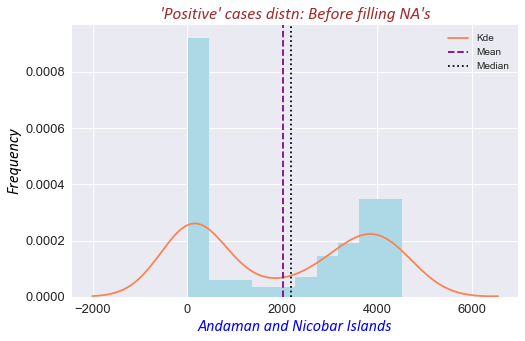

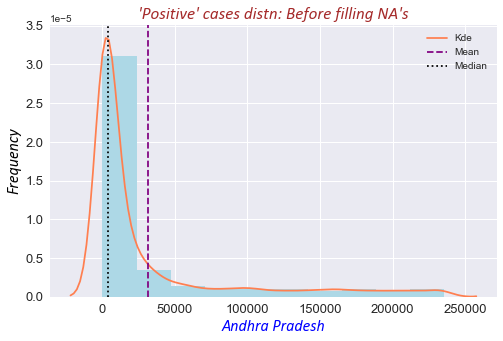

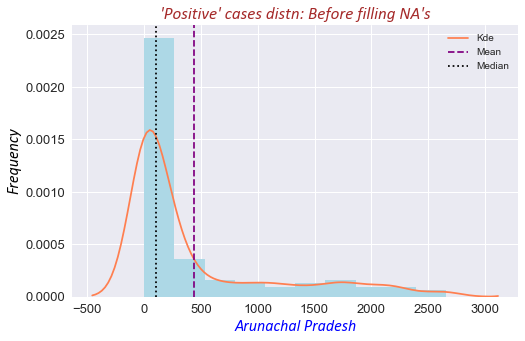

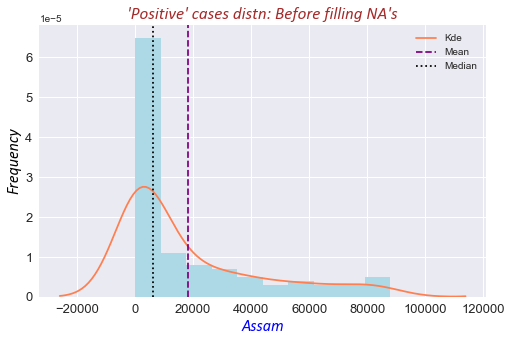

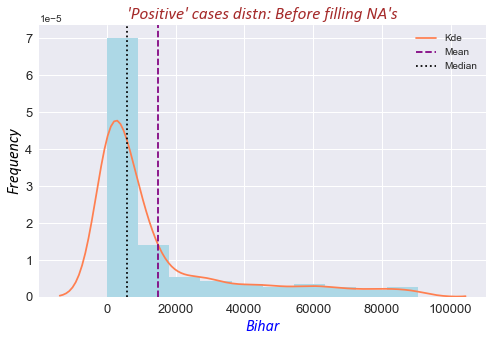

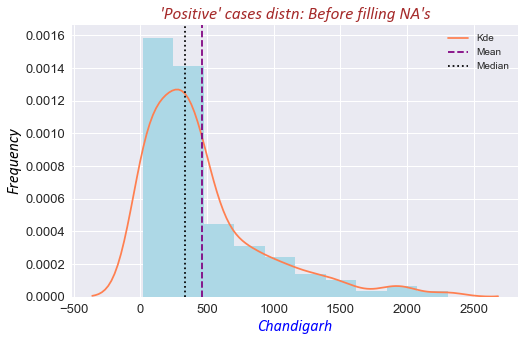

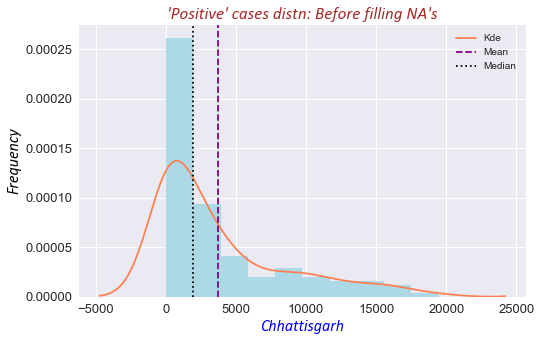

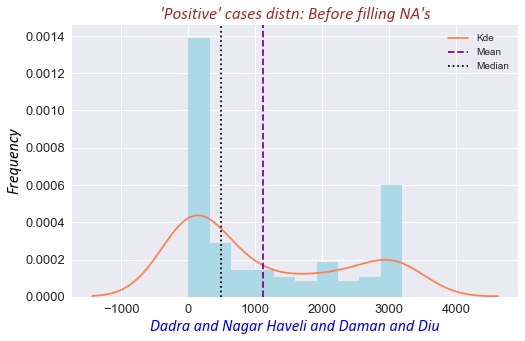

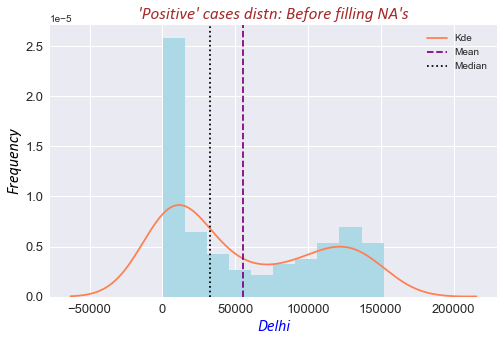

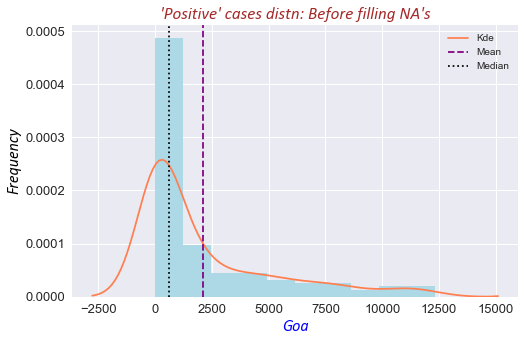

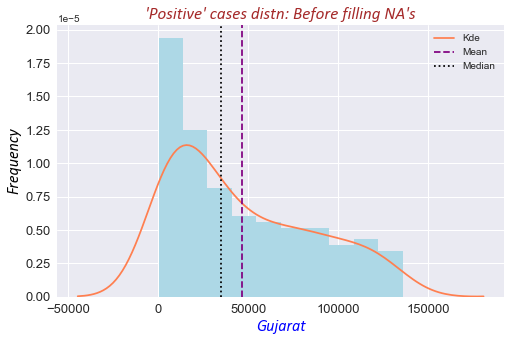

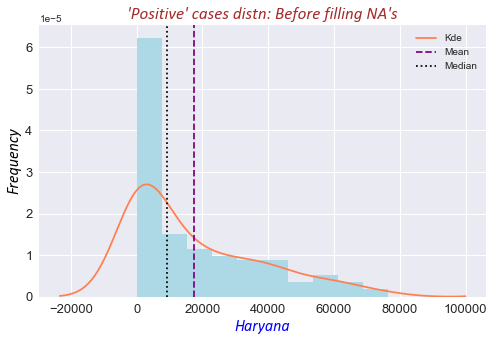

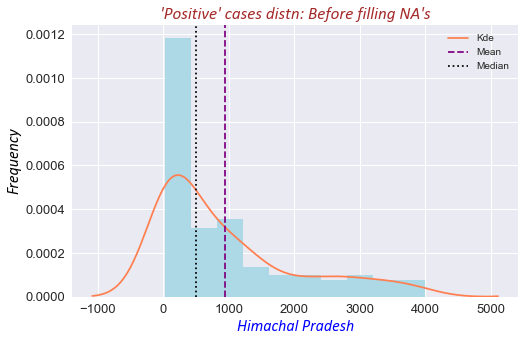

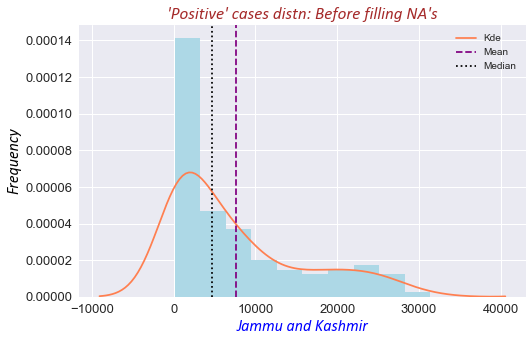

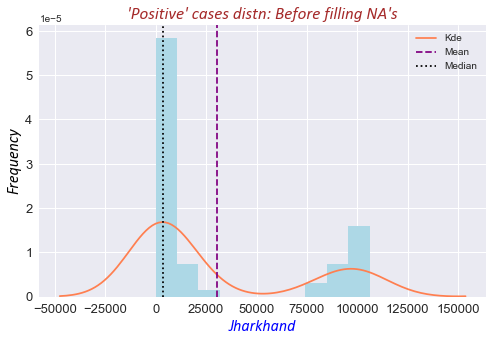

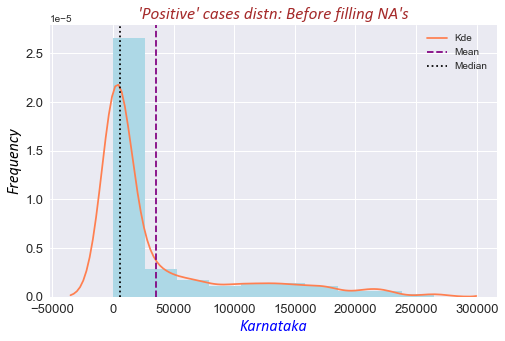

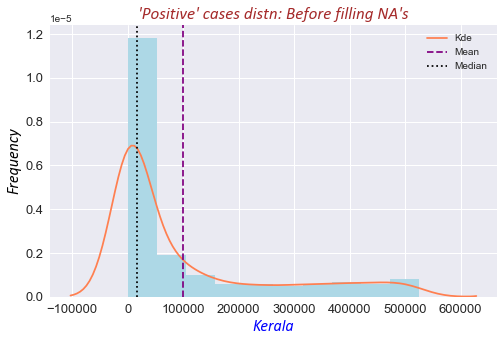

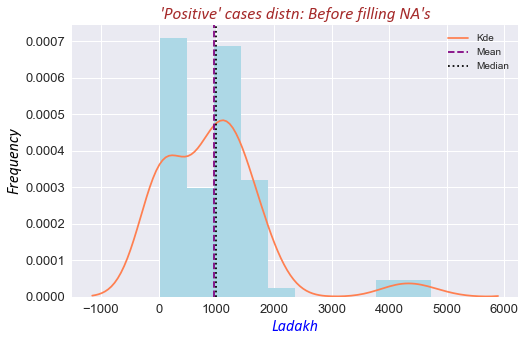

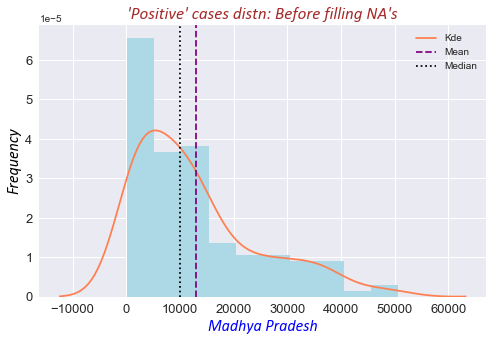

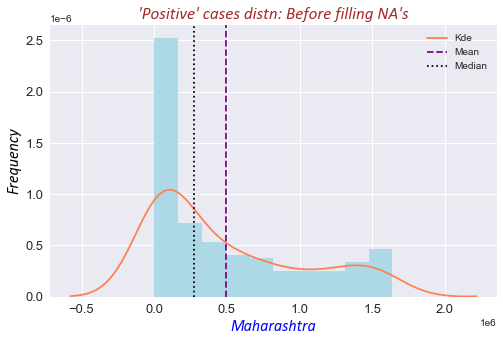

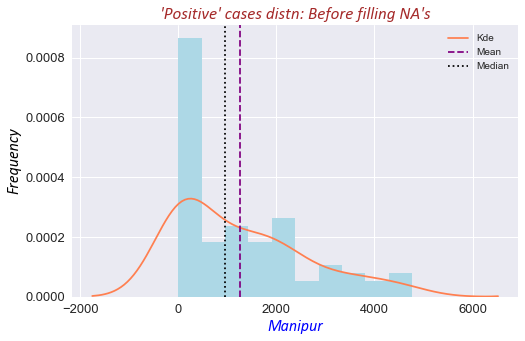

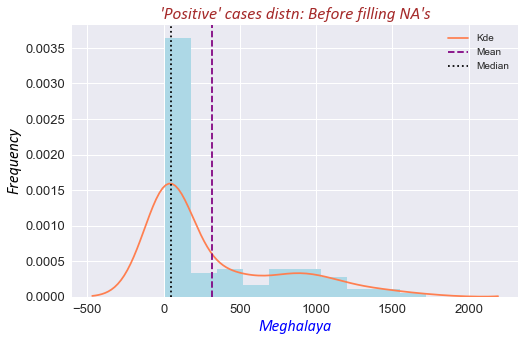

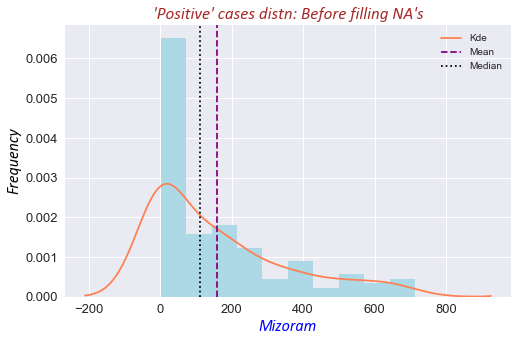

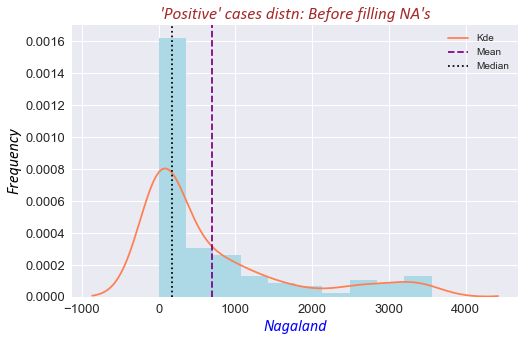

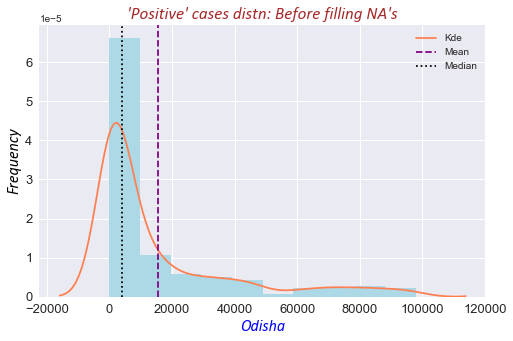

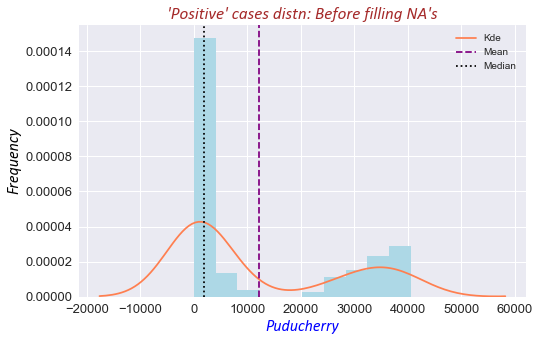

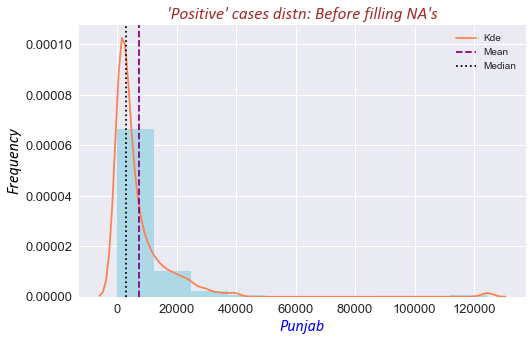

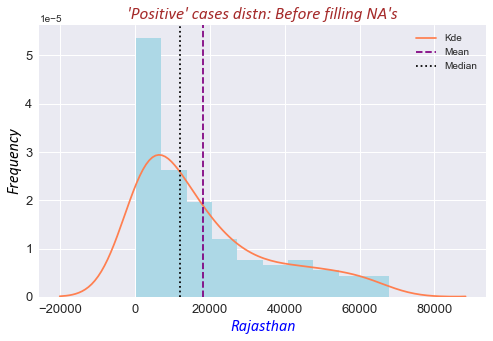

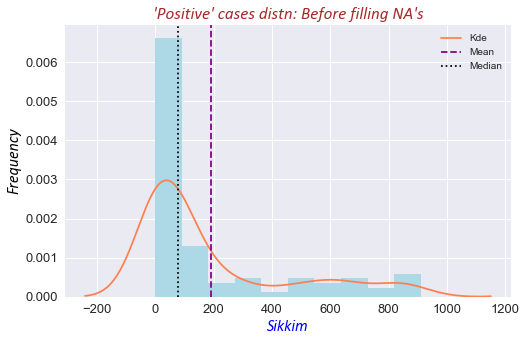

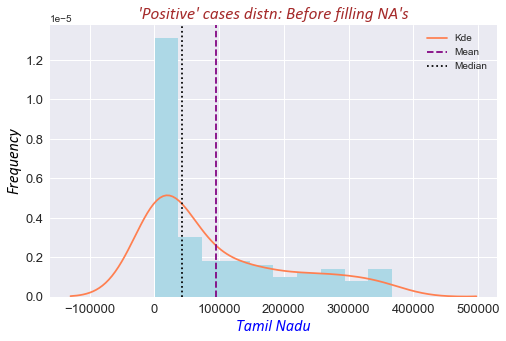

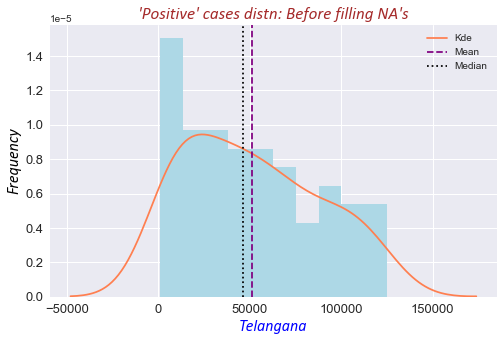

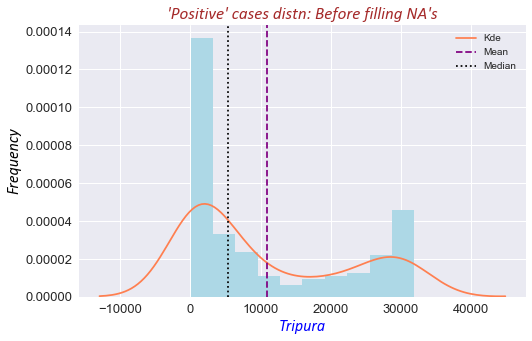

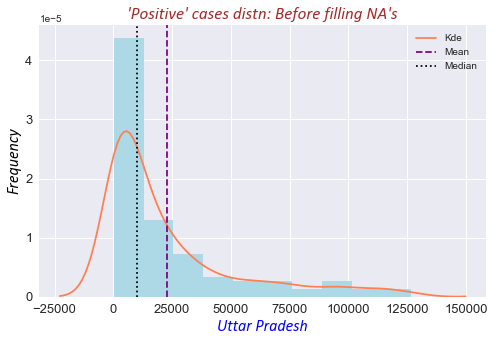

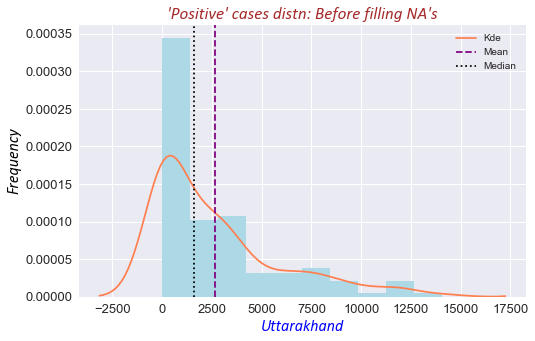

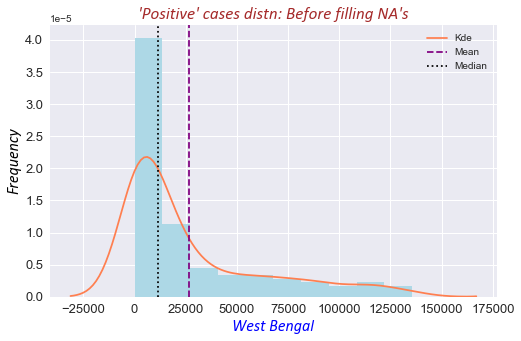

c:\users\rajsh\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
c:\users\rajsh\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


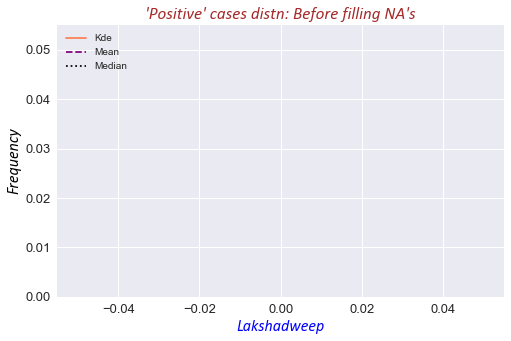

In [36]:
plot_hist_kde(pop_test_df,grp_by_col='State',dist_col='Positive',title="'Positive' cases distn: Before filling NA's")

##### **Imputing NULL values in 'Positive' statewise**
- **``By seeing the above distributions it seems like Median would be more suitable for replacing the NULL values``**

In [37]:
states_pop_median = pop_test_df.groupby(['State'])[['Positive']].median().reset_index().rename(columns={'Positive':'Pos_Median'})
states_pop_median['Pos_Median'].fillna(value=states_pop_median['Pos_Median'].median(),inplace=True)
states_pop_median

,State,Pos_Median
0,Andaman and Nicobar Islands,2186.0
1,Andhra Pradesh,4126.0
2,Arunachal Pradesh,101.0
3,Assam,6067.5
4,Bihar,5695.0
5,Chandigarh,334.0
6,Chhattisgarh,1905.0
7,Dadra and Nagar Haveli and Daman and Diu,495.0
8,Delhi,32810.0
9,Goa,629.0


In [38]:
pop_test_df['Positive'] = pop_test_df[['State','Positive']].apply(lambda row: np.float(states_pop_median[states_pop_median['State'] == row['State']]['Pos_Median']) \
                                        if str(row['Positive']).lower() == str('NaN').lower() else row['Positive'],axis=1)

In [39]:
pop_test_df

,Date,TotalSamples,Negative,Positive,State,Population,Rural population,Urban population,Area,Density,Gender Ratio,Density in km2,Dense_grp
0,2020-04-17,1403.0,1210,12.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,46.0,Dense1
1,2020-04-24,2679.0,NaN,27.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,46.0,Dense1
2,2020-04-27,2848.0,NaN,33.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,46.0,Dense1
3,2020-05-01,3754.0,NaN,33.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,46.0,Dense1
4,2020-05-16,6677.0,NaN,33.0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,46.0,Dense1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7308,2020-11-12,5091700.0,NaN,11290.5,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953,1029.0,Dense4
7309,2020-11-13,5136012.0,NaN,11290.5,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953,1029.0,Dense4
7310,2020-11-14,5180139.0,NaN,11290.5,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953,1029.0,Dense4
7311,2020-11-15,5218797.0,NaN,11290.5,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953,1029.0,Dense4


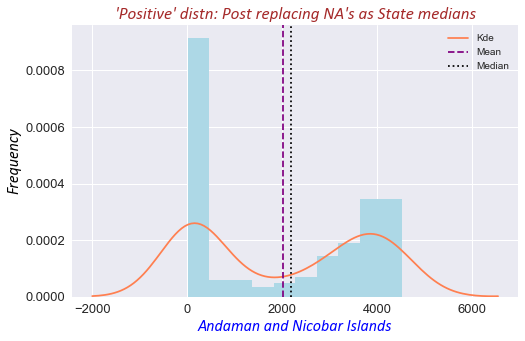

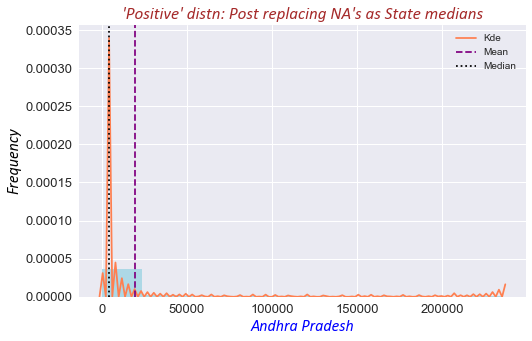

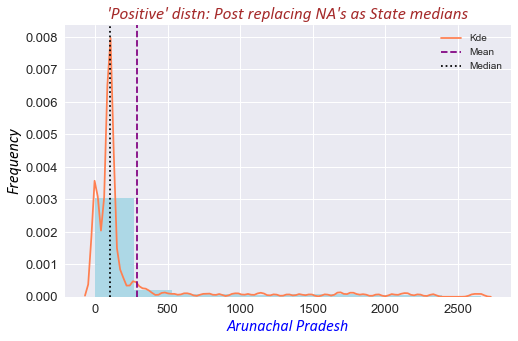

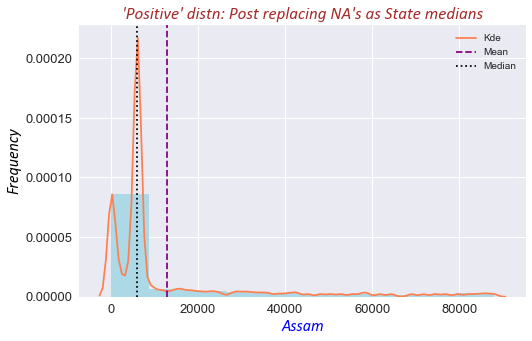

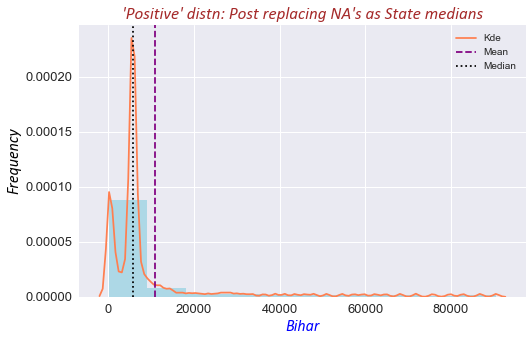

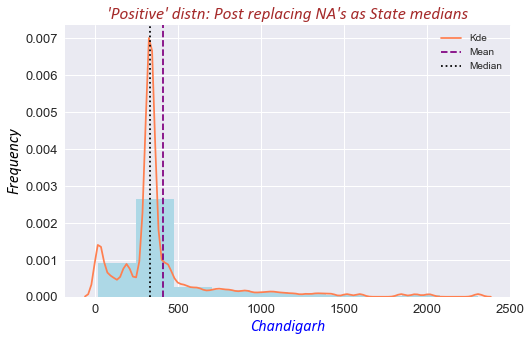

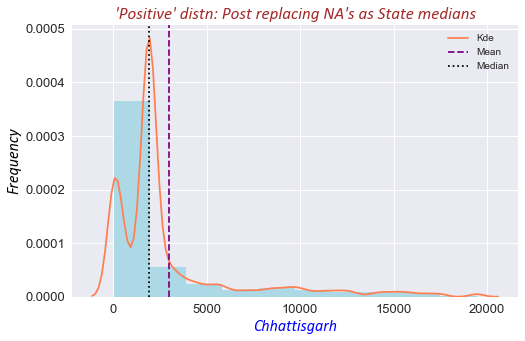

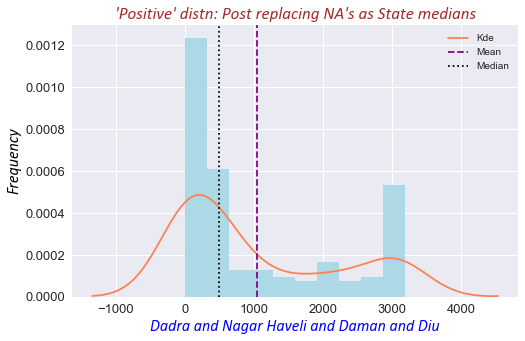

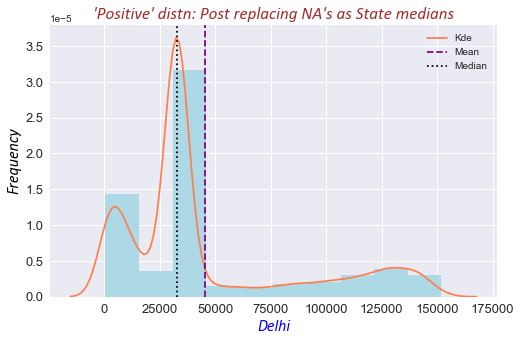

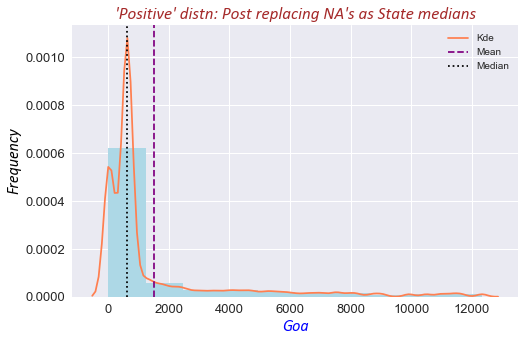

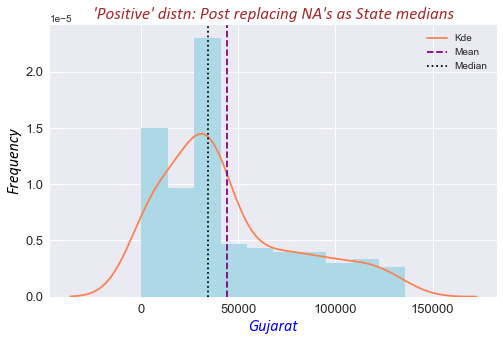

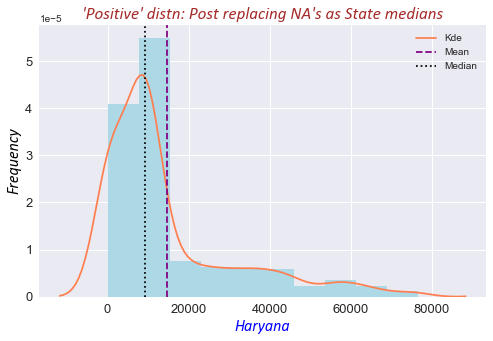

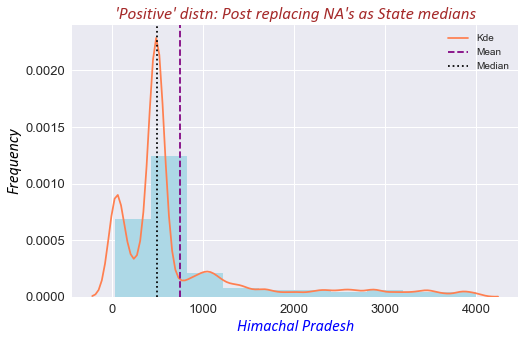

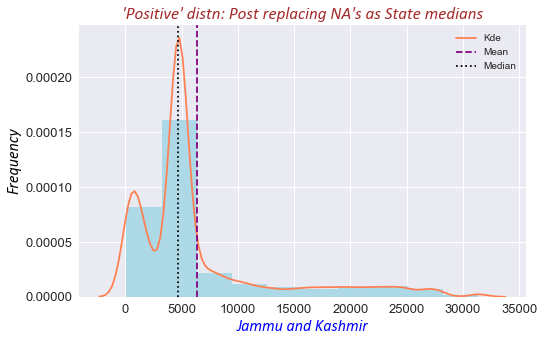

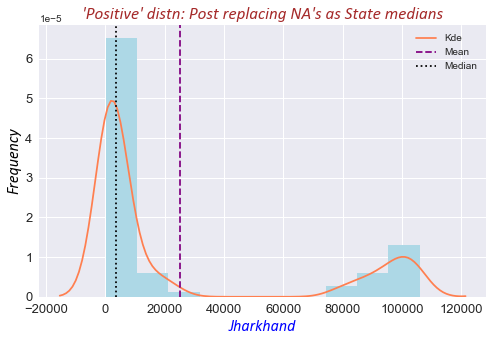

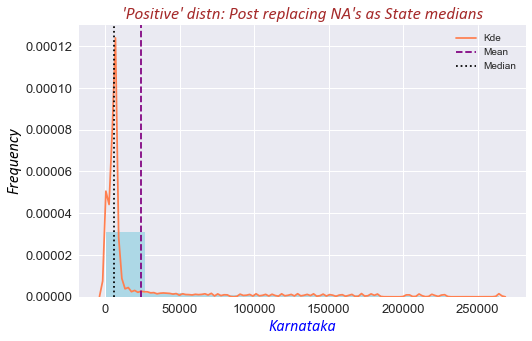

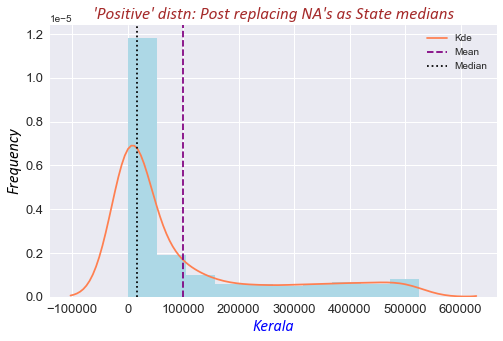

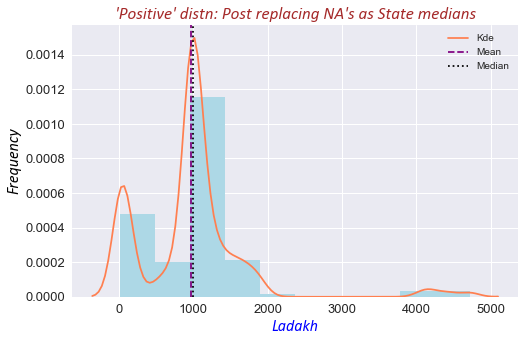

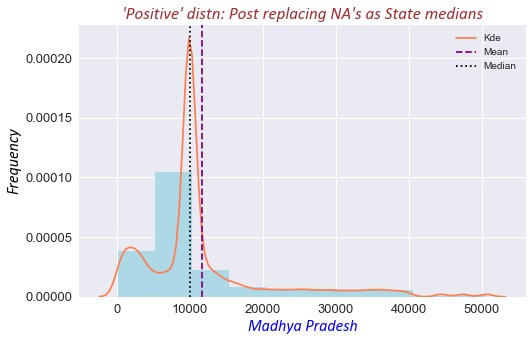

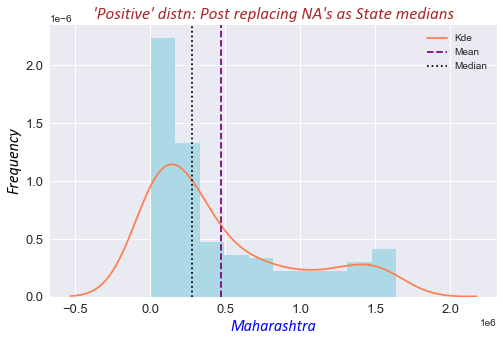

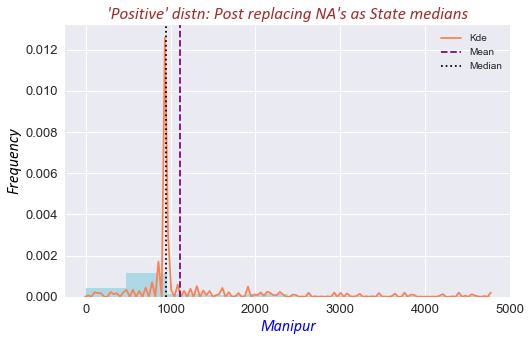

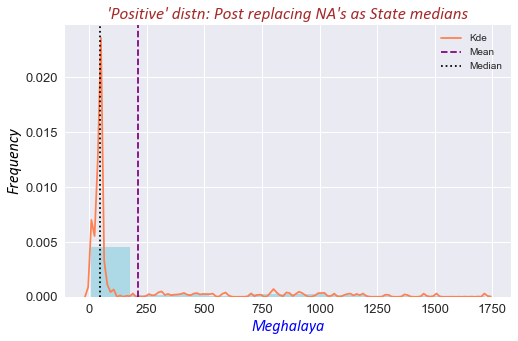

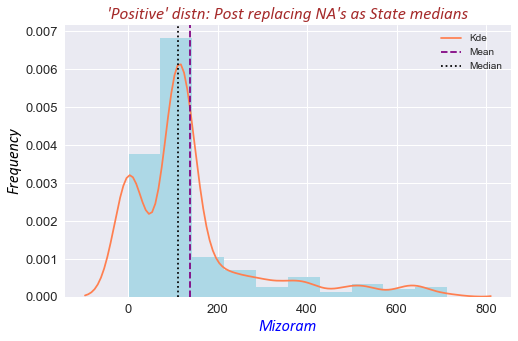

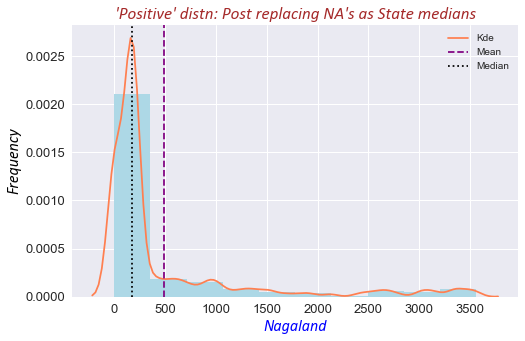

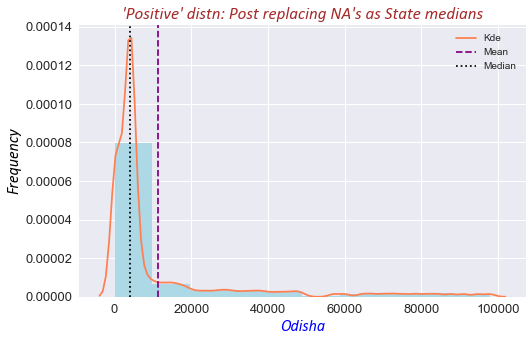

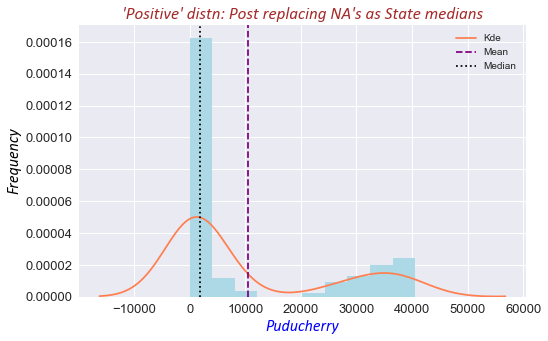

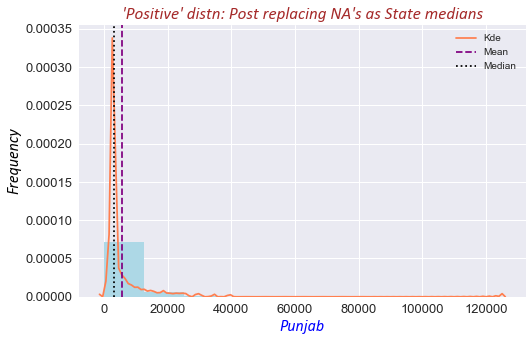

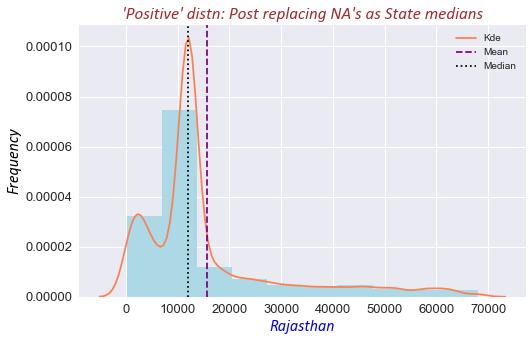

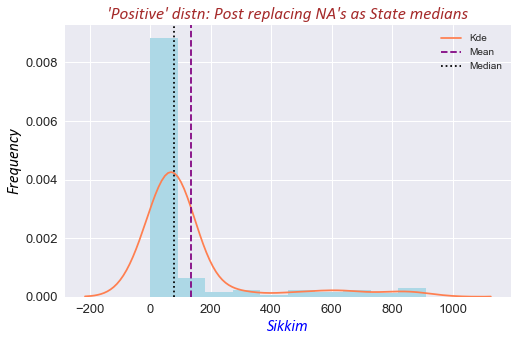

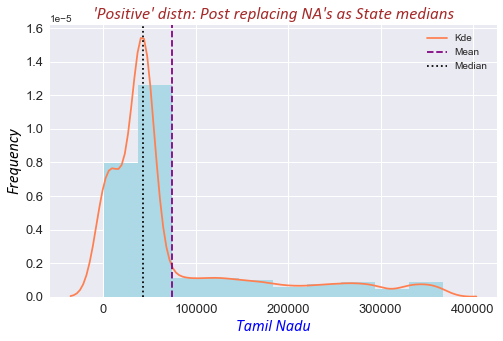

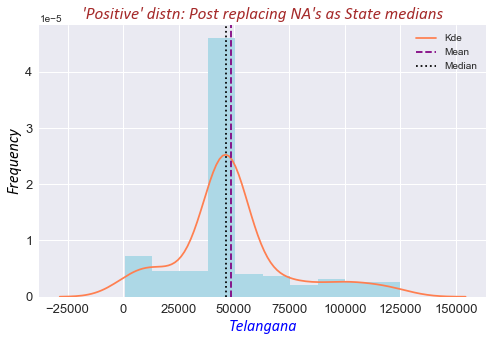

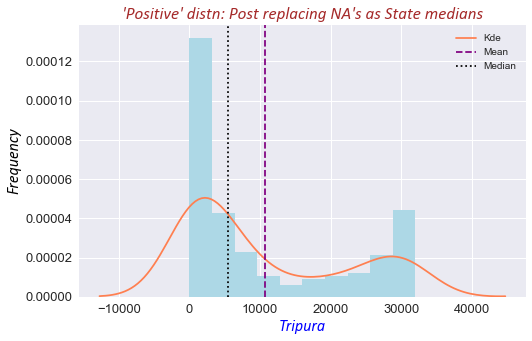

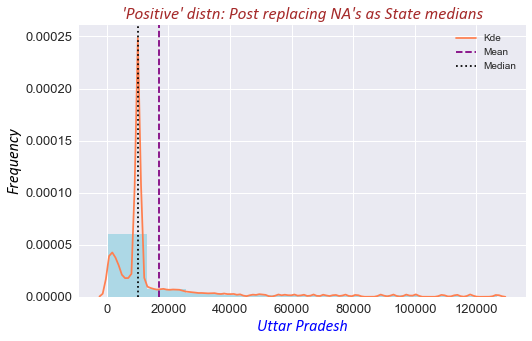

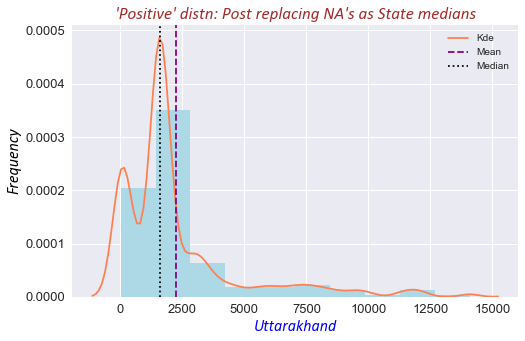

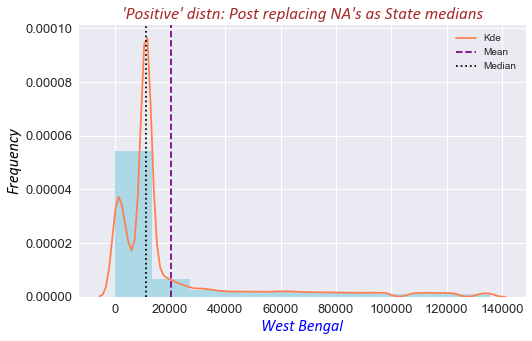

c:\users\rajsh\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


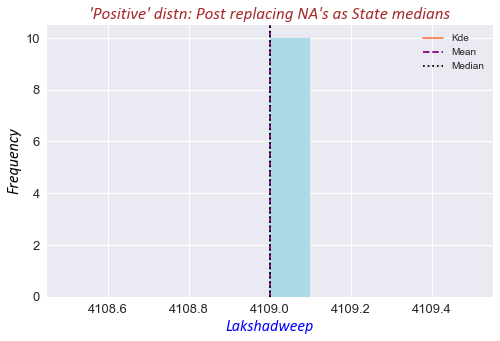

In [40]:
plot_hist_kde(pop_test_df,grp_by_col='State',dist_col='Positive',title="'Positive' distn: Post replacing NA's as State medians")

##### **Overall Distribution of ``Positive`` cases**

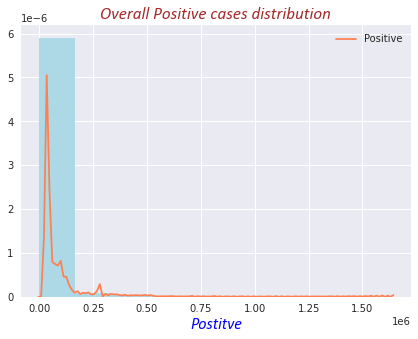

In [41]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(7,5))
    plt.hist(pop_test_df['Positive'],density=True,color='lightblue')
    sns.kdeplot(data=pop_test_df['Positive'],color='coral')
    plt.xlabel("Postitve",fontdict=font_dicts(kind='xlabel'))
    plt.title("Overall Positive cases distribution",fontdict=font_dicts(kind="title"));

##### **By seeing the above distribution, the first impression looks like 'Positive' follows the Power-Rule thus apply the PowerTransformer.** 

In [42]:
from sklearn.preprocessing import PowerTransformer

In [43]:
pt = PowerTransformer(method='yeo-johnson')

##### **Here, in the power transformer I have selected the method as ``'yeo-johnson'`` because ``'box-cox'`` strictly deals with positive values and it looks for the minimum value in the array should be grater than 0. However, in the ``'Positive'`` array the minimum value is 0, therefore going ahead with ``'yeo-johnson'``.**

##### **Checking the sign of values (-1 for negative, 1 for positive and 0 for 0)**

In [44]:
aa = pd.DataFrame(np.sign(pop_test_df['Positive']))
aa[aa.Positive==0]

,Positive
1472,0.0
1473,0.0
1474,0.0
1475,0.0
1476,0.0
...,...
5883,0.0
5884,0.0
5885,0.0
5886,0.0


##### **Minimum value in the array after ignoring NAN's**

In [45]:
np.nanmin(pop_test_df['Positive'])

0.0

In [46]:
annv1_dense_grp = pop_test_df[['Positive','Dense_grp']].iloc[0:-1,:].drop_duplicates().reset_index(drop=True)
annv1_dense_grp.shape

(3976, 2)

In [47]:
annv1_dense_grp['Positive'].isna().sum()

0

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
ss=StandardScaler()

In [51]:
annv1_dense_grp = pd.concat([annv1_dense_grp,pd.DataFrame(ss.fit_transform(pd.DataFrame(scipy.stats.yeojohnson(annv1_dense_grp['Positive'],lmbda=None)[0])[[0]]),columns=['positive_pt'])],axis=1)

In [52]:
#annv1_dense_grp = pd.concat([annv1_dense_grp,pd.DataFrame(pt.fit_transform(annv1_dense_grp[['Positive']]),columns=['positive_pt'])],axis=1)

In [53]:
annv1_dense_grp

,Positive,Dense_grp,positive_pt
0,12.0,Dense1,-2.434070
1,27.0,Dense1,-2.135350
2,33.0,Dense1,-2.059129
3,35.0,Dense1,-2.036642
4,38.0,Dense1,-2.005114
...,...,...,...
3971,116498.0,Dense4,1.376988
3972,119578.0,Dense4,1.388798
3973,122753.0,Dense4,1.400664
3974,132364.0,Dense4,1.434825


In [54]:
pt_dense_grp1 = pd.DataFrame(annv1_dense_grp[annv1_dense_grp['Dense_grp']=='Dense1']['positive_pt']).rename(columns={'positive_pt':'pos_pt_dense1'})
pt_dense_grp2 = pd.DataFrame(annv1_dense_grp[annv1_dense_grp['Dense_grp']=='Dense2']['positive_pt']).rename(columns={'positive_pt':'pos_pt_dense2'})
pt_dense_grp3 = pd.DataFrame(annv1_dense_grp[annv1_dense_grp['Dense_grp']=='Dense3']['positive_pt']).rename(columns={'positive_pt':'pos_pt_dense3'})
pt_dense_grp4 = pd.DataFrame(annv1_dense_grp[annv1_dense_grp['Dense_grp']=='Dense4']['positive_pt']).rename(columns={'positive_pt':'pos_pt_dense4'})
pt_dense_grp5 = pd.DataFrame(annv1_dense_grp[annv1_dense_grp['Dense_grp']=='Dense5']['positive_pt']).rename(columns={'positive_pt':'pos_pt_dense5'})

##### **Check if any NAN's exist post Power Transformation**

In [55]:
pd.DataFrame({'Grp1':[pt_dense_grp1['pos_pt_dense1'].isna().sum()],
              'Grp2':[pt_dense_grp2['pos_pt_dense2'].isna().sum()],
              'Grp3':[pt_dense_grp3['pos_pt_dense3'].isna().sum()],
              'Grp4':[pt_dense_grp4['pos_pt_dense4'].isna().sum()],
              'Grp5':[pt_dense_grp5['pos_pt_dense5'].isna().sum()]})

,Grp1,Grp2,Grp3,Grp4,Grp5
0,0,0,0,0,0


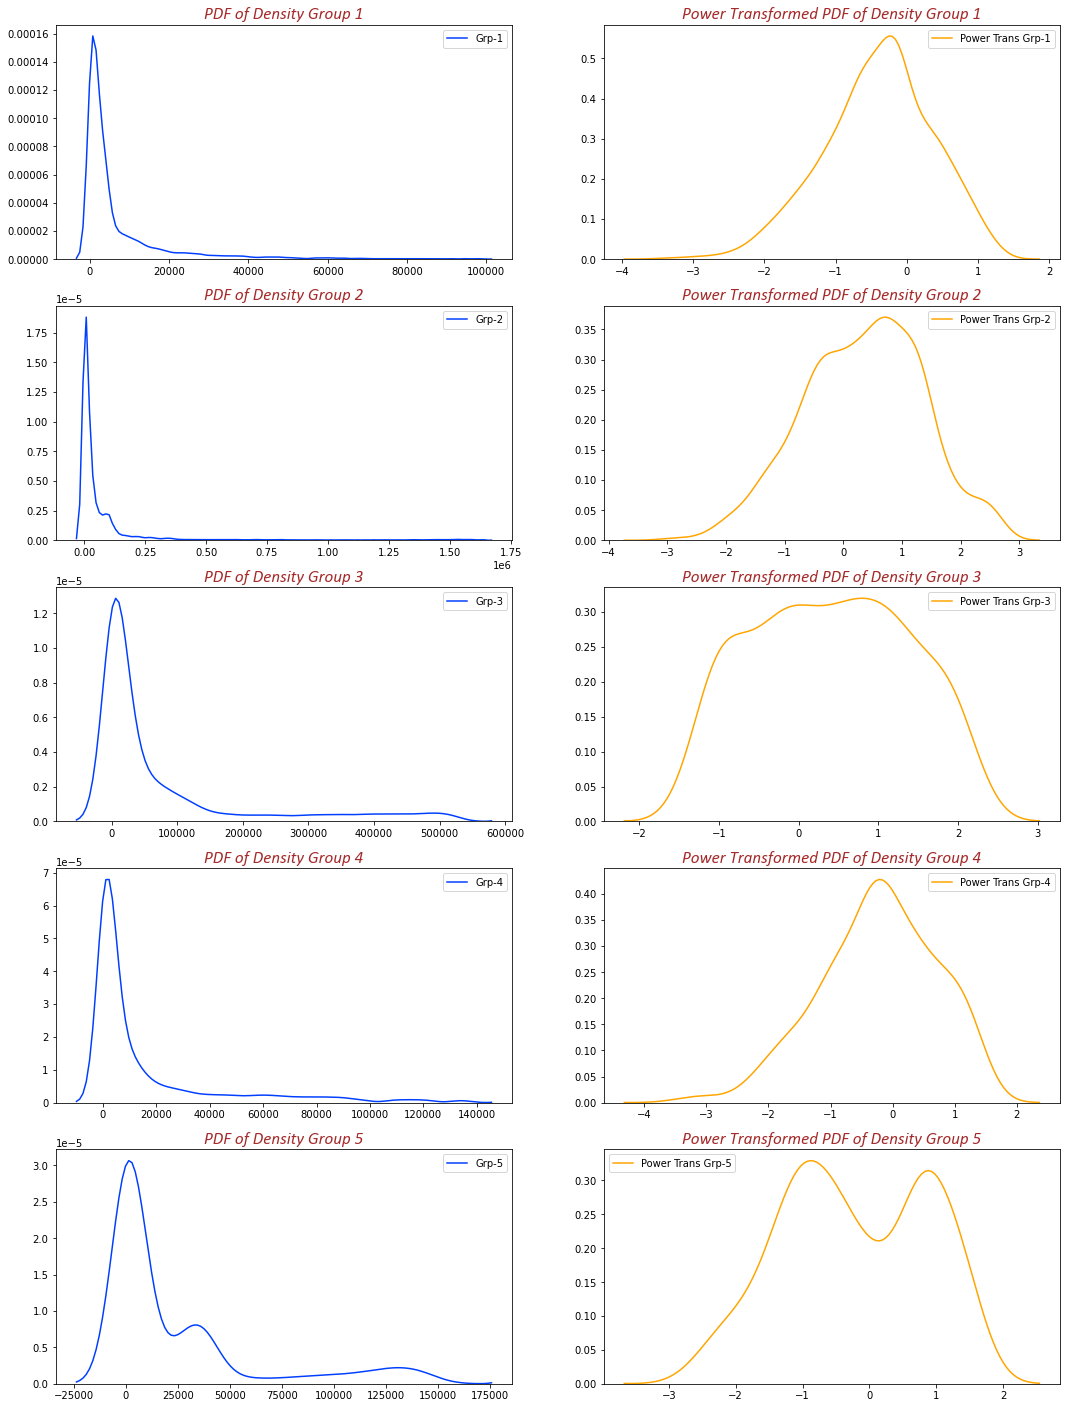

In [56]:
with plt.style.context('seaborn-bright'):
    fig , ax = plt.subplots(nrows=5,ncols=2,figsize=(18,25))
    sns.kdeplot(annv1_dense_grp[annv1_dense_grp['Dense_grp']=='Dense1']['Positive'],ax=ax[0,0],label='Grp-1')
    sns.kdeplot(pt_dense_grp1['pos_pt_dense1'],ax=ax[0,1],label='Power Trans Grp-1',color='orange')
    ax[0,0].set_title('PDF of Density Group 1',fontdict=font_dicts(kind='title'))
    ax[0,1].set_title('Power Transformed PDF of Density Group 1',fontdict=font_dicts(kind='title'))
    
    sns.kdeplot(annv1_dense_grp[annv1_dense_grp['Dense_grp']=='Dense2']['Positive'],ax=ax[1,0],label='Grp-2')
    sns.kdeplot(pt_dense_grp2['pos_pt_dense2'],ax=ax[1,1],label='Power Trans Grp-2',color='orange')
    ax[1,0].set_title('PDF of Density Group 2',fontdict=font_dicts(kind='title'))
    ax[1,1].set_title('Power Transformed PDF of Density Group 2',fontdict=font_dicts(kind='title'))
    
    sns.kdeplot(annv1_dense_grp[annv1_dense_grp['Dense_grp']=='Dense3']['Positive'],ax=ax[2,0],label='Grp-3')
    sns.kdeplot(pt_dense_grp3['pos_pt_dense3'],ax=ax[2,1],label='Power Trans Grp-3',color='orange')
    ax[2,0].set_title('PDF of Density Group 3',fontdict=font_dicts(kind='title'))
    ax[2,1].set_title('Power Transformed PDF of Density Group 3',fontdict=font_dicts(kind='title'))
    
    sns.kdeplot(annv1_dense_grp[annv1_dense_grp['Dense_grp']=='Dense4']['Positive'],ax=ax[3,0],label='Grp-4')
    sns.kdeplot(pt_dense_grp4['pos_pt_dense4'],ax=ax[3,1],label='Power Trans Grp-4',color='orange')
    ax[3,0].set_title('PDF of Density Group 4',fontdict=font_dicts(kind='title'))
    ax[3,1].set_title('Power Transformed PDF of Density Group 4',fontdict=font_dicts(kind='title'))
    
    sns.kdeplot(annv1_dense_grp[annv1_dense_grp['Dense_grp']=='Dense5']['Positive'],ax=ax[4,0],label='Grp-5')
    sns.kdeplot(pt_dense_grp5['pos_pt_dense5'],ax=ax[4,1],label='Power Trans Grp-5',color='orange')
    ax[4,0].set_title('PDF of Density Group 5',fontdict=font_dicts(kind='title'))
    ax[4,1].set_title('Power Transformed PDF of Density Group 5',fontdict=font_dicts(kind='title'))

In [57]:
all_states_pt_pos = pd.DataFrame(pd.concat([pt_dense_grp1['pos_pt_dense1'],
                               pt_dense_grp2['pos_pt_dense2'],
                               pt_dense_grp3['pos_pt_dense3'],
                               pt_dense_grp4['pos_pt_dense4'],
                               pt_dense_grp5['pos_pt_dense5']],axis=0),columns=['positive_pt'])

all_states_pt_pos['positive_pt']

0      -2.434070
1      -2.135350
2      -2.059129
3      -2.036642
4      -2.005114
          ...   
2997    0.901550
2998    0.902276
2999    0.903100
3000    0.903626
3001    0.903900
Name: positive_pt, Length: 3976, dtype: float64

In [58]:
all_states_pt_pos['positive_pt'].isna().sum()

0

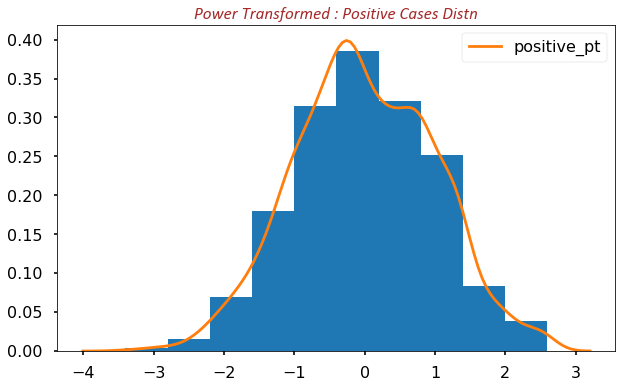

In [59]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(10,6))
    plt.hist(all_states_pt_pos['positive_pt'] ,density=True)
    sns.kdeplot(data=all_states_pt_pos['positive_pt'],bw='scott')
    plt.title("Power Transformed : Positive Cases Distn",fontdict=font_dicts(kind='title'))

##### **Here, it is not a perfect Gaussian or Normal Bell Curve and despite having some deviations on both the tails, overall we can say that it is a normal distribution.**

In [60]:
scipy.stats.skew(all_states_pt_pos['positive_pt'],bias=False)

-0.003036158234518849

In [61]:
scipy.stats.skewtest(all_states_pt_pos['positive_pt'])

SkewtestResult(statistic=-0.07827477685213896, pvalue=0.9376094810463458)

In [62]:
scipy.stats.kurtosis(all_states_pt_pos['positive_pt'],bias=False)

-0.23000557248373132

In [63]:
scipy.stats.kurtosistest(all_states_pt_pos['positive_pt'])

KurtosistestResult(statistic=-3.3224770370815593, pvalue=0.0008922201469807335)

##### **Let's Run some ``Normality Tests`` on the entire Power Transformed 'Positive' feature**

##### **Shapiro-Wilk Test**

In [64]:
scipy.stats.shapiro(all_states_pt_pos['positive_pt'])

ShapiroResult(statistic=0.9976674318313599, pvalue=9.815064004214946e-06)

##### **The number of records are more than 5000 therefore, p-value of Shapiro-Wilk test won't be accurate. Here, it has given a very small p-value which by seeing the above distribution curve doesn't seems right.**

##### **Anderson-Darling Test**

In [84]:
scipy.stats.anderson(all_states_pt_pos['positive_pt'])

AndersonResult(statistic=2.652252075263732, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

##### **Here, we are 99% confident that it doesn't belongs to a normal distribution.**

##### **D-Agostino Test**

In [85]:
scipy.stats.normaltest(all_states_pt_pos['positive_pt'])

NormaltestResult(statistic=11.04498060262551, pvalue=0.003995884584731554)

##### **Anderson-Darling and Agostino both are powerful normality tests. Here, D-Agostino slightly gives an edge towards being a normal distribution.** 

##### **QQ Plot**

In [86]:
from statsmodels.api import ProbPlot

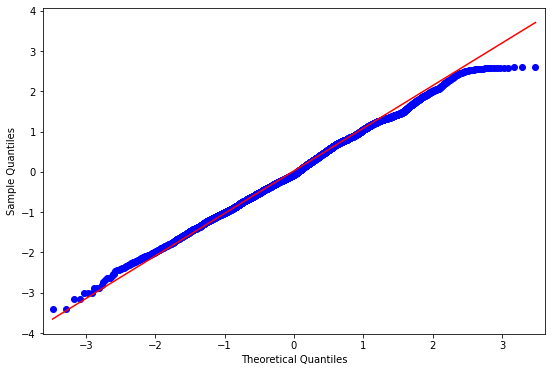

In [96]:
with plt.style.context('seaborn-bright'):
    fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(9,6))
    stm.graphics.gofplots.qqplot(all_states_pt_pos['positive_pt'],ax=ax,line='q')

##### **As noticed in the KDE plot, both the tails have some deviations and same is pointed here in QQ plot. Rest of the plot follows a straight line.**

##### **Lillifers Test**

In [69]:
np.round(np.mean(all_states_pt_pos['positive_pt']),3), np.round(np.std(all_states_pt_pos['positive_pt']),3)

(-0.0, 1.0)

In [70]:
from statsmodels.stats.diagnostic import lilliefors  ## It is a Kolmogorov-Smirnov Test with estimated parameters

lilliefors(all_states_pt_pos['positive_pt'],dist='norm')

(0.025661731372888796, 0.0009999999999998899)

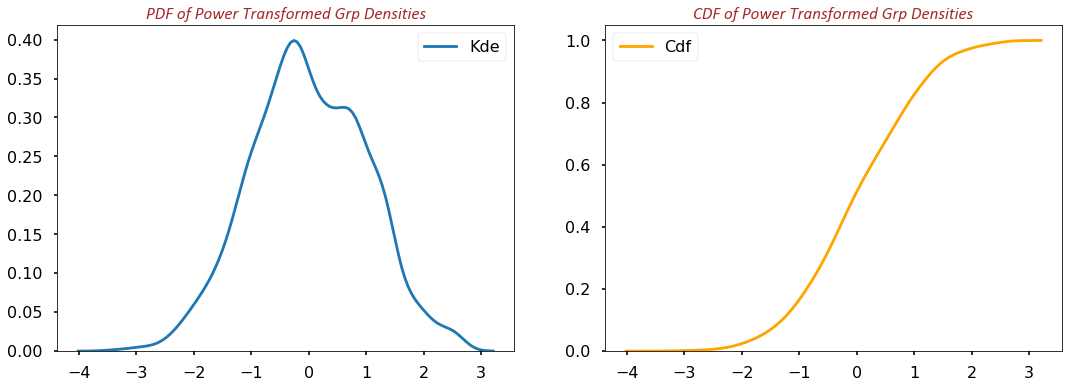

In [71]:
with plt.style.context('seaborn-poster'):
    fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
    sns.kdeplot(all_states_pt_pos['positive_pt'],label='Kde',ax=ax[0],bw='scott')
    ax[0].set_title('PDF of Power Transformed Grp Densities',fontdict=font_dicts(kind='title'))
    sns.kdeplot(all_states_pt_pos['positive_pt'],cumulative=True,label='Cdf',color='orange',ax=ax[1])
    ax[1].set_title('CDF of Power Transformed Grp Densities',fontdict=font_dicts(kind='title'))
    plt.show()

##### **Kolmogorov Smirnov Test**

In [224]:
np.round(np.mean(all_states_pt_pos['positive_pt']),3), np.round(np.std(all_states_pt_pos['positive_pt']),3)

(-0.0, 1.0)

In [245]:
scipy.stats.kstest(all_states_pt_pos['positive_pt'],cdf='norm',mode='auto')

KstestResult(statistic=0.025663976892299267, pvalue=0.010441759115162142)

##### **Majority of the tests have suggested that it's not following a normal distribution.**

##### **Will also conduct these tests on the model residuals and will look for the ANOVA assumption of Normality and Equal variances among the groups.**

##### **Let's first perform the ANOVA test for verifying the difference in means then perform the Non-parametric Kruskal-Wallis test.**

#### **``Running One-Way ANOVA``**

In [73]:
scipy.stats.f_oneway(pt_dense_grp1['pos_pt_dense1'],
                     pt_dense_grp2['pos_pt_dense2'],
                     pt_dense_grp3['pos_pt_dense3'],
                     pt_dense_grp4['pos_pt_dense4'],
                     pt_dense_grp5['pos_pt_dense5'])

F_onewayResult(statistic=137.43244292966435, pvalue=3.834952237442604e-110)

In [74]:
grp_pos_cases = pd.DataFrame({'Dense1':pt_dense_grp1['pos_pt_dense1'],
                              'Dense2':pt_dense_grp2['pos_pt_dense2'],
                              'Dense3':pt_dense_grp3['pos_pt_dense3'],
                              'Dense4':pt_dense_grp4['pos_pt_dense4'],
                              'Dense5':pt_dense_grp5['pos_pt_dense5']})

In [75]:
grp_pos_cases

,Dense1,Dense2,Dense3,Dense4,Dense5
0,-2.434070,NaN,NaN,NaN,NaN
1,-2.135350,NaN,NaN,NaN,NaN
2,-2.059129,NaN,NaN,NaN,NaN
3,-2.036642,NaN,NaN,NaN,NaN
4,-2.005114,NaN,NaN,NaN,NaN
...,...,...,...,...,...
3971,NaN,NaN,NaN,1.376988,NaN
3972,NaN,NaN,NaN,1.388798,NaN
3973,NaN,NaN,NaN,1.400664,NaN
3974,NaN,NaN,NaN,1.434825,NaN


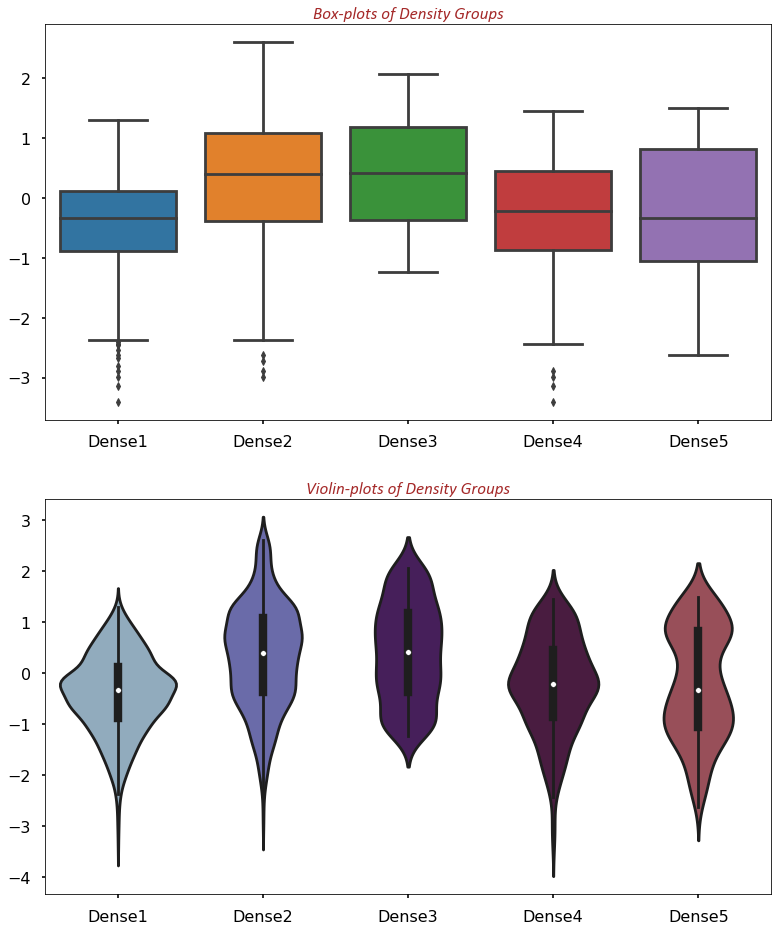

In [76]:
with plt.style.context('seaborn-poster'):
    fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(13,16))
    sns.boxplot(data=grp_pos_cases,ax=ax[0])
    ax[0].set_title("Box-plots of Density Groups",fontdict=font_dicts(kind='title'))
    sns.violinplot(data=grp_pos_cases,ax=ax[1],palette=sns.color_palette('twilight'))
    ax[1].set_title("Violin-plots of Density Groups",fontdict=font_dicts(kind='title'))

In [77]:
grp_pos_cases_melt = pd.melt(frame=grp_pos_cases.reset_index(),id_vars='index',value_vars=grp_pos_cases.columns,var_name='Dense_Grps',value_name='Positive').dropna().reset_index(drop=True).drop(columns=['index'],axis=1).reset_index()
grp_pos_cases_melt.head()

,index,Dense_Grps,Positive
0,0,Dense1,-2.434070
1,1,Dense1,-2.135350
2,2,Dense1,-2.059129
3,3,Dense1,-2.036642
4,4,Dense1,-2.005114


In [78]:
from statsmodels.formula.api import ols
from statsmodels.stats.api import anova_lm

In [79]:
dense_grp_model = ols('Positive ~ C(Dense_Grps)',data=grp_pos_cases_melt).fit()

In [80]:
dense_grp_model_anova_table = anova_lm(dense_grp_model,robust='hc3',typ='I')
dense_grp_model_anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Dense_Grps),4.0,483.489543,120.872386,137.432443,3.834952e-110
Residual,3971.0,3492.510457,0.879504,NaN,NaN


In [81]:
dense_grps_f = scipy.stats.f(dense_grp_model_anova_table['df'][0],dense_grp_model_anova_table['df'][1])
dense_grp_model_anova_table['alpha'] = [0.05,None]
dense_grp_model_anova_table['F_crit'] = [dense_grps_f.ppf(0.95),None]
dense_grp_model_anova_table

,df,sum_sq,mean_sq,F,PR(>F),alpha,F_crit
C(Dense_Grps),4.0,483.489543,120.872386,137.432443,3.834952e-110,0.05,2.37417
Residual,3971.0,3492.510457,0.879504,NaN,NaN,NaN,NaN


##### **So, here it becomes quite evident that Null Hypothesis has been rejected by a great margin as there is a huge difference in the Critical value and Test Statistic. Thus, we can say that means of the groups varying alot.**

In [82]:
dense_grp_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Positive   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     137.4
Date:                Mon, 23 Nov 2020   Prob (F-statistic):          3.83e-110
Time:                        22:29:56   Log-Likelihood:                -5383.9
No. Observations:                3976   AIC:                         1.078e+04
Df Residuals:                    3971   BIC:                         1.081e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.4036      0.026    -15.373      0.000      -0.455      -0.352
C(Dense_Grps)[T.Dense2]     0.7416      0.035     21.096      0.000       0.673       0.811
C(Dense_Grps)[T.Dense3]     0.8035      0.057     14.088      0.000       0.692       0.915
C(Dense_Grps)[T.Dense4]     0.1729      0.056      3.103      0.002       0.064       0.282
C(Dense_Grps)[T.Dense5]     0.1897      0.055      3.476      0.001       0.083       0.297
==============================================================================
Omnibus:                       40.304   Durbin-Watson:                   0.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.461
Skew:                          -0.199   Prob(JB):                     7.34e-09
Kurtosis:                       2.741   Cond. No.                         5.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
dense_grp_resid = dense_grp_model.resid

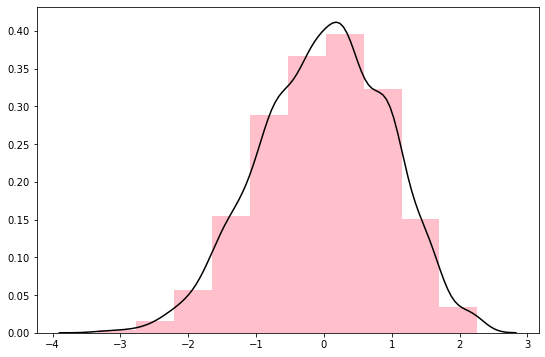

In [103]:
with plt.style.context('seaborn-bright'):
    fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(9,6))
    plt.hist(dense_grp_resid,density=True,color='pink')
    sns.kdeplot(dense_grp_resid,ax=ax,color='black')

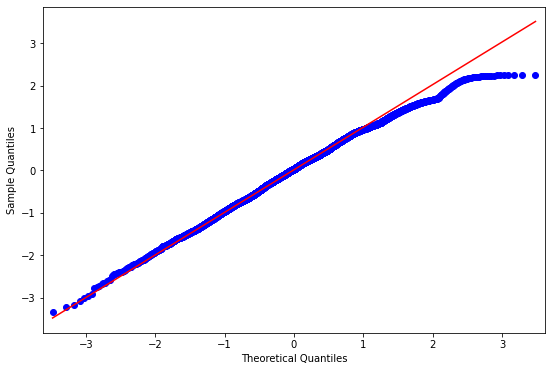

In [106]:
with plt.style.context('seaborn-bright'):
    fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(9,6))
    stm.graphics.gofplots.qqplot(dense_grp_resid,ax=ax,line='q')

##### **Post-Hoc Tukey's HSD Test**

In [107]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd as tukeyhsd

In [108]:
post_hoc_results = tukeyhsd(grp_pos_cases_melt['Positive'],groups=grp_pos_cases_melt['Dense_Grps'])

In [109]:
post_hoc_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Dense1,Dense2,0.7416,0.001,0.6457,0.8376,True
Dense1,Dense3,0.8035,0.001,0.6479,0.9592,True
Dense1,Dense4,0.1729,0.0165,0.0208,0.325,True
Dense1,Dense5,0.1897,0.0047,0.0408,0.3387,True
Dense2,Dense3,0.0619,0.7752,-0.0903,0.2141,False
Dense2,Dense4,-0.5687,0.001,-0.7172,-0.4202,True
Dense2,Dense5,-0.5519,0.001,-0.6972,-0.4065,True
Dense3,Dense4,-0.6306,0.001,-0.8232,-0.438,True
Dense3,Dense5,-0.6138,0.001,-0.8039,-0.4237,True
Dense4,Dense5,0.0168,0.9,-0.1704,0.204,False


c:\users\rajsh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


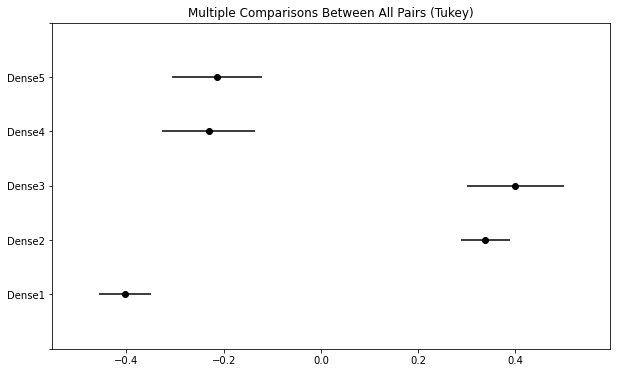

In [110]:
post_hoc_results.plot_simultaneous();

In [111]:
dense_grps_grand_mean = np.mean(grp_pos_cases.describe().loc['mean'])

In [112]:
def marginal_row_mean_plot(df,grand_mean,row1=False,row2=False,row3=False,row4=False,row5=False,row6=False):
    """
    Description: This function is created for plotting the marginal mean graph of a dataset having at most 6 groups or columns.
    
    Input parameter:
        1. df : DataFrame having treatment or group data
        2. grand_mean : Overall mean of groups or str
        3. row1 : Row or Block 1 or str
        4. row2 : Row or Block 2 or str
        5. row3 : Row or Block 3 or str
        6. row4 : Row or Block 4 or str
        7. row5 : Row or Block 5 or str
        8. row6 : Row or Block 6 or str
    
    Output: Generate the Marginal Mean Graph
    
    Work-in-progress :: These two marginal mean plot functions to be combined in one as a generic function.
    """
    plt.figure(figsize=(10,7))
    with plt.style.context("classic"):
        plt.axhline(grand_mean,linestyle='--',color='black',label='Grand Mean')
        if row1 != False:
            plt.plot(df[row1][0],marker='>',ls='',ms=12,color='pink',label='Row/Block 1 mean')
        if row2 != False:
            plt.plot(df[row2][1],marker='>',ls='',ms=12,color='gray',label='Row/Block 2 mean')
        if row3 != False:
            plt.plot(df[row3][2],marker='>',ls='',ms=12,color='yellow',label='Row/Block 3 mean')
        if row4 != False:
            plt.plot(df[row4][3],marker='>',ls='',ms=12,color='skyblue',label='Row/Block 4 mean')
        if row5 != False:
            plt.plot(df[row5][4],marker='>',ls='',ms=12,color='lightgray',label='Row/Block 5 mean')
        if row6 != False:
            plt.plot(df[row6][5],marker='>',ls='',ms=12,color='orange',label='Row/Block 6 mean')
        plt.xticks(rotation=25)
        plt.title('Marginal Mean Graph of Blocks or Rows',fontdict={'size':20, 'family':'calibri', 'color':'coral', 'style': 'italic'})
    plt.legend()
    return None

def marginal_mean_plot(df,grand_mean,grp1,grp2,grp3=False,grp4=False,grp5=False,grp6=False,
                       row_graph_flg=False,row1=False,row2=False,row3=False,row4=False,row5=False,row6=False):
    """
    Description: This function is created for plotting the marginal mean graph of a dataset having at most 6 groups/columns and blocks/rows.
    
    Input parameter:
        1. df : DataFrame having treatment or group data
        2. grand_mean : Overall mean of groups or str
        3. grp1 : Column or Treatment 1 or str
        4. grp2 : Column or Treatment 2 or str
        5. grp3 : Column or Treatment 3 or str
        6. grp4 : Column or Treatment 4 or str
        7. grp5 : Column or Treatment 5 or str
        8. grp6 : Column or Treatment 6 or str
    
    Output: Generate the Marginal Mean Graphs
    """
    plt.figure(figsize=(10,7))
    with plt.style.context("classic"):
        plt.axhline(grand_mean,linestyle='--',color='black',label='Grand Mean')
        plt.plot(np.mean(df[~df[grp1].isna()][grp1]),marker='*',ls='',ms=12,color='red',label='Grp({}) mean'.format(grp1))
        plt.plot(np.mean(df[~df[grp2].isna()][grp2]),marker='*',ls='',ms=12,color='green',label='Grp({}) mean'.format(grp2))
        if grp3 != False:
            plt.plot(np.mean(df[~df[grp3].isna()][grp3]),marker='*',ls='',ms=12,color='blue',label='Grp({}) mean'.format(grp3))
        if grp4 != False:
            plt.plot(np.mean(df[~df[grp4].isna()][grp4]),marker='*',ls='',ms=12,color='brown',label='Grp({}) mean'.format(grp4))
        if grp5 != False:
            plt.plot(np.mean(df[~df[grp5].isna()][grp5]),marker='*',ls='',ms=12,color='purple',label='Grp({}) mean'.format(grp5))
        if grp6 != False:
            plt.plot(np.mean(df[~df[grp6].isna()][grp6]),marker='*',ls='',ms=12,color='coral',label='Grp({}) mean'.format(grp6))
        plt.xticks(rotation=25)
        plt.title('Marginal Mean Graph',fontdict={'size':22, 'family':'calibri', 'color':'coral', 'style': 'italic'})
    plt.legend()
    
    if row_graph_flg!=False:
        marginal_row_mean_plot(df=df,grand_mean=grand_mean,row1=row1,row2=row2,row3=row3,row4=row4,row5=row5,row6=row6)
    return None

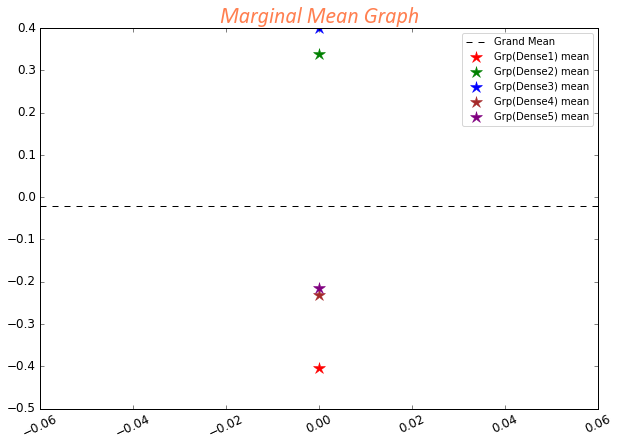

In [113]:
marginal_mean_plot(grp_pos_cases,dense_grps_grand_mean,
                   grp1='Dense1',
                   grp2='Dense2',
                   grp3='Dense3',
                   grp4='Dense4',
                   grp5='Dense5')

##### **Here, its also been proved that Grp4 and Grp5 have closer means.**

##### **Normlity Tests on Model Residuals**

In [114]:
scipy.stats.anderson(dense_grp_resid)

AndersonResult(statistic=3.9950042327282063, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [115]:
scipy.stats.normaltest(dense_grp_resid)

NormaltestResult(statistic=40.30410635651301, pvalue=1.7704126565201233e-09)

In [116]:
from statsmodels.stats.diagnostic import lilliefors

In [117]:
lilliefors(dense_grp_resid)

(0.02237560488258883, 0.0009999999999998899)

In [118]:
scipy.stats.kstest(dense_grp_resid,cdf='norm')

KstestResult(statistic=0.025651036031644425, pvalue=0.01049714753962541)

##### **Homogenity Tests**

In [119]:
scipy.stats.bartlett(grp_pos_cases[~grp_pos_cases['Dense1'].isna()]['Dense1'],
                     grp_pos_cases[~grp_pos_cases['Dense2'].isna()]['Dense2'],
                     grp_pos_cases[~grp_pos_cases['Dense3'].isna()]['Dense3'],
                     grp_pos_cases[~grp_pos_cases['Dense4'].isna()]['Dense4'],
                     grp_pos_cases[~grp_pos_cases['Dense5'].isna()]['Dense5'])

BartlettResult(statistic=130.2137139048428, pvalue=3.505078917545573e-27)

##### **Parametric Levene Test**

In [120]:
scipy.stats.levene(grp_pos_cases[~grp_pos_cases['Dense1'].isna()]['Dense1'],
                     grp_pos_cases[~grp_pos_cases['Dense2'].isna()]['Dense2'],
                     grp_pos_cases[~grp_pos_cases['Dense3'].isna()]['Dense3'],
                     grp_pos_cases[~grp_pos_cases['Dense4'].isna()]['Dense4'],
                     grp_pos_cases[~grp_pos_cases['Dense5'].isna()]['Dense5'],center='mean')

LeveneResult(statistic=43.88995730432964, pvalue=4.2273834535615835e-36)

##### **All the above tests concludes that Density Groups have a significant role in the variantion of number of cases reported in the states.**

##### **Now, there is one important point that in the earlier plotting we found that our data doesn't belongs to a normal distribution which is one of the ANOVA assumptions. And, the variances of data are also not equal across the groups. Therefore, we will conduct the Non-parametric tests.**

##### **Non-parametric replacement of ANOVA is ``Kruskal-Wallis`` Test**

In [121]:
scipy.stats.kruskal(pt_dense_grp1['pos_pt_dense1'],
                     pt_dense_grp2['pos_pt_dense2'],
                     pt_dense_grp3['pos_pt_dense3'],
                     pt_dense_grp4['pos_pt_dense4'],
                     pt_dense_grp5['pos_pt_dense5'])

KruskalResult(statistic=465.62372045417294, pvalue=1.819534601931187e-99)

In [122]:
import scikit_posthocs

##### **Post-Hoc -- MannWhitney Test with no correction of alpha**

In [123]:
pd.DataFrame(scikit_posthocs.posthoc_mannwhitney(grp_pos_cases_melt[['Dense_Grps','Positive']],
                                                 val_col='Positive',
                                                 group_col='Dense_Grps')).applymap(lambda val: np.round(val,5))

,Dense1,Dense2,Dense3,Dense4,Dense5
Dense1,1.00000,0.00000,0.00000,0.00027,0.00360
Dense2,0.00000,1.00000,0.43591,0.00000,0.00000
Dense3,0.00000,0.43591,1.00000,0.00000,0.00000
Dense4,0.00027,0.00000,0.00000,1.00000,0.99716
Dense5,0.00360,0.00000,0.00000,0.99716,1.00000


##### **Quite similar results here too, Grp4 and Grp5 tends to have some similarities. Now, to get more precise results I would use ``Sidak`` correction for alpha as it is a very powerful concept and personally like this concept.**
##### **NOTE: We can also use Bonferroni Correction but it might be not so accurate some times.**

##### **Post-Hoc -- MannWhitney Test with Sidak correction of alpha**

In [124]:
pd.DataFrame(scikit_posthocs.posthoc_mannwhitney(grp_pos_cases_melt[['Dense_Grps','Positive']],
                                                 val_col='Positive',
                                                 group_col='Dense_Grps',
                                                 p_adjust='sidak')).applymap(lambda val: np.round(val,5))

,Dense1,Dense2,Dense3,Dense4,Dense5
Dense1,1.00000,0.00000,0.00000,0.00274,0.03543
Dense2,0.00000,1.00000,0.99674,0.00000,0.00000
Dense3,0.00000,0.99674,1.00000,0.00000,0.00000
Dense4,0.00274,0.00000,0.00000,1.00000,1.00000
Dense5,0.03543,0.00000,0.00000,1.00000,1.00000


##### **Fairly same results with some precise values.**

##### **Non-Parametric Levene Test**

In [125]:
scipy.stats.levene(grp_pos_cases[~grp_pos_cases['Dense1'].isna()]['Dense1'],
                     grp_pos_cases[~grp_pos_cases['Dense2'].isna()]['Dense2'],
                     grp_pos_cases[~grp_pos_cases['Dense3'].isna()]['Dense3'],
                     grp_pos_cases[~grp_pos_cases['Dense4'].isna()]['Dense4'],
                     grp_pos_cases[~grp_pos_cases['Dense5'].isna()]['Dense5'],center='median')

LeveneResult(statistic=42.883650220306166, pvalue=2.844472046993574e-35)

## **``Two Factor ANOVA``**

In [126]:
anger_mood = pd.read_excel('Datasets/angry_moods.xls')

In [127]:
anger_mood.head()

,Gender,Sports,Anger-Out,Anger-In,Control-Out,Control-In,Anger_Expression
0,2,1,18,13,23,20,36
1,2,1,14,17,25,24,30
2,2,1,13,14,28,28,19
3,2,1,17,24,23,23,43
4,1,1,16,17,26,28,27


In [128]:
anger_mood.describe()

,Gender,Sports,Anger-Out,Anger-In,Control-Out,Control-In,Anger_Expression
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,1.615385,1.679487,16.076923,18.576923,23.692308,21.961538,37.000000
std,0.489653,0.469694,4.217370,4.697386,4.688498,4.945002,12.941426
min,1.000000,1.000000,9.000000,10.000000,14.000000,11.000000,7.000000
25%,1.000000,1.000000,13.000000,15.000000,21.000000,18.250000,27.000000
50%,2.000000,2.000000,16.000000,18.500000,24.000000,22.000000,36.000000
75%,2.000000,2.000000,18.000000,22.000000,27.000000,24.750000,44.750000
max,2.000000,2.000000,27.000000,31.000000,32.000000,32.000000,68.000000


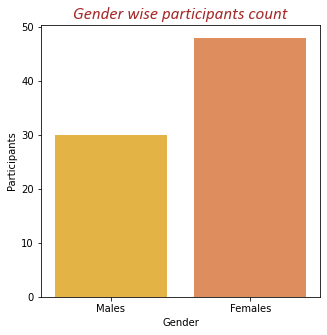

In [129]:
with plt.style.context('seaborn-bright'):
    plt.figure(figsize=(5,5))
    sns.barplot(data=anger_mood['Gender'].value_counts().reset_index().rename(columns={'index':'Gender','Gender':'Participants'}),
                x='Gender',y='Participants',palette=sns.color_palette('plasma_r'))
    plt.xticks([0,1],['Males','Females'])
    plt.title('Gender wise participants count',fontdict=font_dicts(kind='title'))

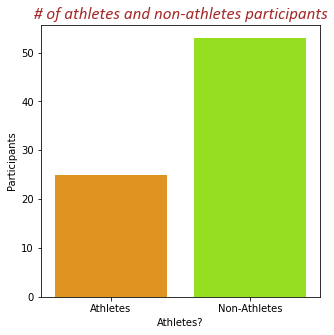

In [130]:
with plt.style.context('seaborn-bright'):
    plt.figure(figsize=(5,5))
    sns.barplot(data=anger_mood['Sports'].value_counts().reset_index().rename(columns={'index':'Athletes?','Sports':'Participants'}),
                x='Athletes?',y='Participants',palette=sns.color_palette('gist_rainbow'))
    plt.xticks([0,1],['Athletes','Non-Athletes'])
    plt.title('# of athletes and non-athletes participants',fontdict=font_dicts(kind='title'))

In [178]:
anger_out_pt = pd.DataFrame(scipy.stats.boxcox(anger_mood['Anger-Out'])[0])[0]

In [179]:
anger_out_pt

0     2.938922
1     2.679492
2     2.603134
3     2.879852
4     2.817242
        ...   
73    2.679492
74    2.333327
75    2.431247
76    2.750638
77    2.750638
Name: 0, Length: 78, dtype: float64

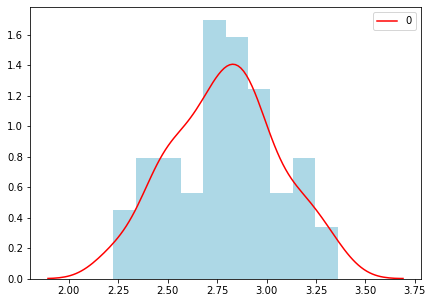

In [180]:
with plt.style.context('seaborn-bright'):
    plt.figure(figsize=(7,5))
    plt.hist(anger_out_pt,density=True,color='lightblue')
    sns.kdeplot(anger_out_pt,color='red')

In [182]:
scipy.stats.skew(anger_mood['Anger-Out'],bias=False)

0.5856542652644214

In [183]:
scipy.stats.skew(anger_out_pt,bias=False)

-0.0004965443387343199

In [184]:
scipy.stats.skewtest(anger_mood['Anger-Out'])

SkewtestResult(statistic=2.114149991165024, pvalue=0.03450245856975766)

In [185]:
scipy.stats.skewtest(anger_out_pt)

SkewtestResult(statistic=-0.0018956488195151877, pvalue=0.998487491980067)

In [186]:
scipy.stats.kurtosis(anger_mood['Anger-Out'],bias=False)

-0.0579720414522944

In [187]:
scipy.stats.kurtosis(anger_out_pt,bias=False)

-0.4424467016261513

In [188]:
scipy.stats.kurtosistest(anger_mood['Anger-Out'])

KurtosistestResult(statistic=0.08226222673612164, pvalue=0.9344381912761975)

In [189]:
scipy.stats.kurtosistest(anger_out_pt)

KurtosistestResult(statistic=-0.8634396349496412, pvalue=0.38789579550255027)

In [136]:
scipy.stats.anderson(anger_mood['Anger-Out'])

AndersonResult(statistic=0.8866161999077633, critical_values=array([0.55 , 0.626, 0.752, 0.877, 1.043]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [190]:
scipy.stats.anderson(anger_out_pt)

AndersonResult(statistic=0.42091177774017297, critical_values=array([0.55 , 0.626, 0.752, 0.877, 1.043]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [137]:
scipy.stats.normaltest(anger_mood['Anger-Out'])

NormaltestResult(statistic=4.476397259090656, pvalue=0.10665044841294197)

In [191]:
scipy.stats.normaltest(anger_out_pt)

NormaltestResult(statistic=0.7455315966864164, pvalue=0.6888265382707246)

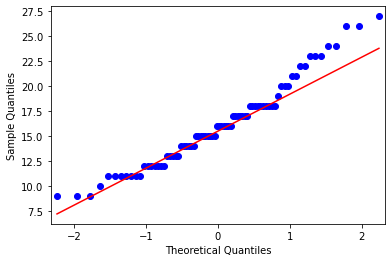

In [199]:
stm.graphics.gofplots.qqplot(data=anger_mood['Anger-Out'],line='q');

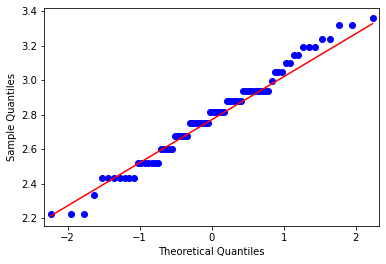

In [200]:
stm.graphics.gofplots.qqplot(data=anger_out_pt,line='q');

<AxesSubplot:>

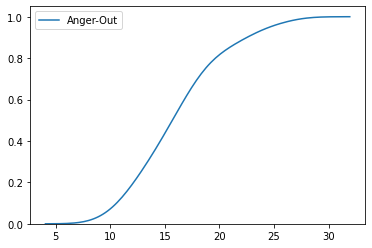

In [202]:
sns.kdeplot(anger_mood['Anger-Out'],cumulative=True)

<AxesSubplot:>

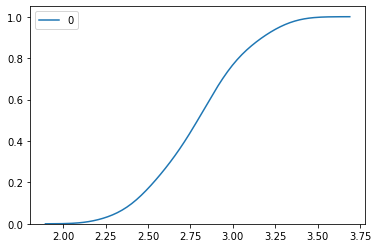

In [201]:
sns.kdeplot(anger_out_pt,cumulative=True)

In [204]:
scipy.stats.kstest(anger_mood['Anger-Out'],'norm')

KstestResult(statistic=1.0, pvalue=0.0)

In [206]:
np.round(np.mean(anger_out_pt),3), np.round(np.std(anger_out_pt),3)

(2.788, 0.267)

In [205]:
scipy.stats.kstest(anger_out_pt,'norm')

KstestResult(statistic=0.9869662951831715, pvalue=1.889403494844932e-147)

In [220]:
anger_out_pt_ss = pd.DataFrame(ss.fit_transform(pd.DataFrame(anger_out_pt)))[0]

In [221]:
np.round(np.mean(anger_out_pt_ss),3), np.round(np.std(anger_out_pt_ss),3)

(0.0, 1.0)

In [222]:
scipy.stats.kstest(anger_out_pt_ss,'norm')

KstestResult(statistic=0.08117785751780704, pvalue=0.6527048356296961)

In [223]:
anger_mood.head()

,Gender,Sports,Anger-Out,Anger-In,Control-Out,Control-In,Anger_Expression
0,2,1,18,13,23,20,36
1,2,1,14,17,25,24,30
2,2,1,13,14,28,28,19
3,2,1,17,24,23,23,43
4,1,1,16,17,26,28,27


In [ ]:
with plt.style.context('seaborn-bright'):
    fig , ax = plt.subplots(nrows=5,ncols=2,figsize=(18,25))
    sns.kdeplot(annv1_dense_grp[annv1_dense_grp['Dense_grp']=='Dense1']['Positive'],ax=ax[0,0],label='Grp-1')
    sns.kdeplot(pt_dense_grp1['pos_pt_dense1'],ax=ax[0,1],label='Power Trans Grp-1',color='orange')
    ax[0,0].set_title('PDF of Density Group 1',fontdict=font_dicts(kind='title'))
    ax[0,1].set_title('Power Transformed PDF of Density Group 1',fontdict=font_dicts(kind='title'))
    
    sns.kdeplot(annv1_dense_grp[annv1_dense_grp['Dense_grp']=='Dense2']['Positive'],ax=ax[1,0],label='Grp-2')
    sns.kdeplot(pt_dense_grp2['pos_pt_dense2'],ax=ax[1,1],label='Power Trans Grp-2',color='orange')
    ax[1,0].set_title('PDF of Density Group 2',fontdict=font_dicts(kind='title'))
    ax[1,1].set_title('Power Transformed PDF of Density Group 2',fontdict=font_dicts(kind='title'))
    
    sns.kdeplot(annv1_dense_grp[annv1_dense_grp['Dense_grp']=='Dense3']['Positive'],ax=ax[2,0],label='Grp-3')
    sns.kdeplot(pt_dense_grp3['pos_pt_dense3'],ax=ax[2,1],label='Power Trans Grp-3',color='orange')
    ax[2,0].set_title('PDF of Density Group 3',fontdict=font_dicts(kind='title'))
    ax[2,1].set_title('Power Transformed PDF of Density Group 3',fontdict=font_dicts(kind='title'))
    
    sns.kdeplot(annv1_dense_grp[annv1_dense_grp['Dense_grp']=='Dense4']['Positive'],ax=ax[3,0],label='Grp-4')
    sns.kdeplot(pt_dense_grp4['pos_pt_dense4'],ax=ax[3,1],label='Power Trans Grp-4',color='orange')
    ax[3,0].set_title('PDF of Density Group 4',fontdict=font_dicts(kind='title'))
    ax[3,1].set_title('Power Transformed PDF of Density Group 4',fontdict=font_dicts(kind='title'))
    
    sns.kdeplot(annv1_dense_grp[annv1_dense_grp['Dense_grp']=='Dense5']['Positive'],ax=ax[4,0],label='Grp-5')
    sns.kdeplot(pt_dense_grp5['pos_pt_dense5'],ax=ax[4,1],label='Power Trans Grp-5',color='orange')
    ax[4,0].set_title('PDF of Density Group 5',fontdict=font_dicts(kind='title'))
    ax[4,1].set_title('Power Transformed PDF of Density Group 5',fontdict=font_dicts(kind='title'))

In [140]:
from sklearn.preprocessing import StandardScaler

In [141]:
ss= StandardScaler()

#### **W/O Normalizing the data**

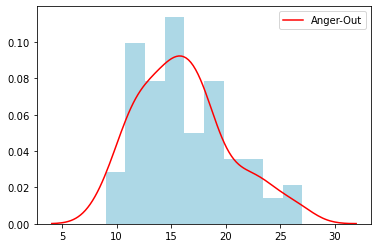

In [142]:
plt.hist(anger_mood['Anger-Out'],density=True,color='lightblue')
sns.kdeplot(anger_mood['Anger-Out'],color='red');

In [143]:
scipy.stats.kstest(anger_mood['Anger-Out'],'norm')

KstestResult(statistic=1.0, pvalue=0.0)

#### **With Standard Scaling the data**

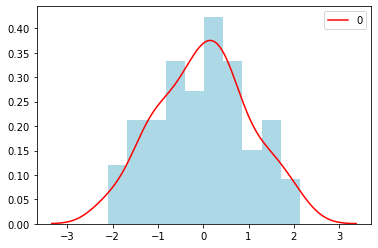

In [144]:
plt.hist(pd.DataFrame(pt.fit_transform(anger_mood[['Anger-Out']]))[0],density=True,color='lightblue')
sns.kdeplot(pd.DataFrame(pt.fit_transform(anger_mood[['Anger-Out']]))[0],color='red');

In [145]:
scipy.stats.kstest(pd.DataFrame(pt.fit_transform(anger_mood[['Anger-Out']]))[0],cdf=scipy.stats.norm.cdf)

KstestResult(statistic=0.08101539732420615, pvalue=0.655131303931415)

In [289]:
rand_data = np.random.randint(low=1000,high=4000,size=900)

In [147]:
rand_data = np.random.lognormal(size=800)

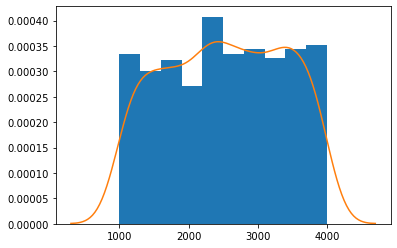

In [290]:
plt.hist(rand_data,density=True)
sns.kdeplot(rand_data);

In [291]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [292]:
mm=MinMaxScaler()
rb=RobustScaler()

In [294]:
rand_data_pt = pd.DataFrame(scipy.stats.boxcox(rand_data,lmbda=None)[0])[0]

In [295]:
rand_data_pt

0      1189.015847
1       425.276800
2      1110.587438
3       945.096577
4      1019.224440
          ...     
895    1075.117807
896     816.971976
897     818.885180
898     837.657244
899     924.535697
Name: 0, Length: 900, dtype: float64

In [296]:
np.mean(rand_data_pt), np.std(rand_data_pt)

(917.0422185725408, 270.25432086964037)

<AxesSubplot:>

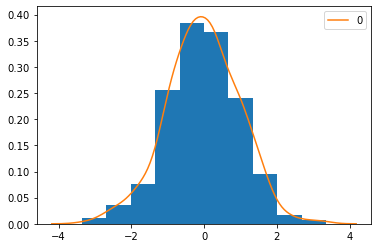

In [154]:
plt.hist(rand_data_pt,density=True)
sns.kdeplot(data=rand_data_pt)

In [155]:
scipy.stats.skew(rand_data), scipy.stats.skewtest(rand_data)

(5.922912063556094,
 SkewtestResult(statistic=25.71790555932869, pvalue=7.3713829476352815e-146))

In [156]:
scipy.stats.skew(rand_data_pt), scipy.stats.skewtest(rand_data_pt)

(-0.08621469508324972,
 SkewtestResult(statistic=-1.0028442985675623, pvalue=0.31593599144146345))

In [157]:
scipy.stats.kurtosis(rand_data), scipy.stats.kurtosistest(rand_data)

(53.544593420667645,
 KurtosistestResult(statistic=17.176151929078316, pvalue=4.0062033189813395e-66))

In [158]:
scipy.stats.kurtosis(rand_data_pt), scipy.stats.kurtosistest(rand_data_pt)

(0.28108368949719154,
 KurtosistestResult(statistic=1.5765915029385502, pvalue=0.11488954916036967))

In [159]:
scipy.stats.shapiro(rand_data)

ShapiroResult(statistic=0.5366368293762207, pvalue=1.9557922666581472e-41)

In [160]:
scipy.stats.shapiro(rand_data_pt)

ShapiroResult(statistic=0.9970858693122864, pvalue=0.1598287671804428)

In [161]:
scipy.stats.anderson(rand_data)

AndersonResult(statistic=81.69945549743443, critical_values=array([0.573, 0.653, 0.783, 0.913, 1.087]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [162]:
scipy.stats.anderson(rand_data_pt)

AndersonResult(statistic=0.48977649855453365, critical_values=array([0.573, 0.653, 0.783, 0.913, 1.087]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [163]:
scipy.stats.normaltest(rand_data)

NormaltestResult(statistic=956.4308614493302, pvalue=2.059099225705294e-208)

In [164]:
scipy.stats.normaltest(rand_data_pt)

NormaltestResult(statistic=3.491337454307503, pvalue=0.17452823816198973)

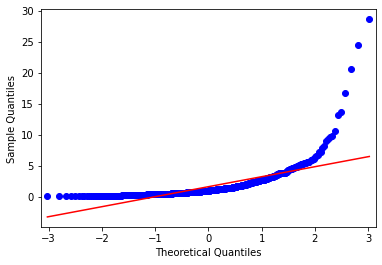

In [165]:
ProbPlot(rand_data).qqplot(line='r');

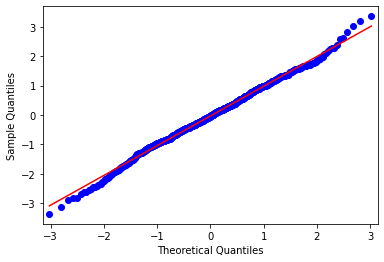

In [166]:
ProbPlot(rand_data_pt).qqplot(line='r');

In [297]:
scipy.stats.kstest(rand_data,cdf='norm')   ## Raw sample data was used

KstestResult(statistic=1.0, pvalue=0.0)

In [298]:
scipy.stats.kstest(rand_data_pt,cdf='norm') ## Power Transformed Sample Data was used

KstestResult(statistic=1.0, pvalue=0.0)

In [306]:
rand_data_pt_ss = pd.DataFrame(ss.fit_transform(pd.DataFrame(rand_data_pt)))[0]

In [307]:
np.round(np.mean(rand_data_pt_ss),4), np.round(np.std(rand_data_pt_ss),4)

(-0.0, 1.0)

In [308]:
scipy.stats.kstest(rand_data_pt_ss,cdf='norm') ## Standard Scaled Power-Transformed Sample data was used

KstestResult(statistic=0.06728609692245524, pvalue=0.0005490481175285979)